In [1]:
def calculate_cell_scores(board_size=6):
    scores = [[0 for _ in range(board_size)] for _ in range(board_size)]
    
    # Horizontal lines
    for i in range(board_size):
        for j in range(board_size - 3):
            for k in range(4):
                if 0 <= i < board_size and 0 <= j + k < board_size:
                    scores[i][j + k] += 1
    
    # Vertical lines
    for j in range(board_size):
        for i in range(board_size - 3):
            for k in range(4):
                if 0 <= i + k < board_size and 0 <= j < board_size:
                    scores[i + k][j] += 1
    
    # Diagonal / (top-left to bottom-right)
    for i in range(board_size - 3):
        for j in range(board_size - 3):
            for k in range(4):
                if 0 <= i + k < board_size and 0 <= j + k < board_size:
                    scores[i + k][j + k] += 1
    
    # Diagonal \ (top-right to bottom-left)
    for i in range(board_size - 3):
        for j in range(3, board_size):
            for k in range(4):
                if 0 <= i + k < board_size and 0 <= j - k < board_size:
                    scores[i + k][j - k] += 1
    
    return scores

# Print the scores in a readable format
def print_scores(scores):
    for row in scores:
        print(" ".join(map(str, row)))

# Calculate and display
board_scores = calculate_cell_scores()
print_scores(board_scores)

3 4 5 5 4 3
4 6 8 8 6 4
5 8 11 11 8 5
5 8 11 11 8 5
4 6 8 8 6 4
3 4 5 5 4 3


In [4]:
def calculate_cell_scores(board):
    board_size = len(board)
    scores = [[0 for _ in range(board_size)] for _ in range(board_size)]
    
    # Horizontal lines
    for i in range(board_size):
        for j in range(board_size - 3):
            has_enemy = False
            for k in range(4):
                if board[i][j + k] == -1:
                    has_enemy = True
                    break
            if not has_enemy:
                for k in range(4):
                    if 0 <= i < board_size and 0 <= j + k < board_size:
                        scores[i][j + k] += 1
    
    # Vertical lines
    for j in range(board_size):
        for i in range(board_size - 3):
            has_enemy = False
            for k in range(4):
                if board[i + k][j] == -1:
                    has_enemy = True
                    break
            if not has_enemy:
                for k in range(4):
                    if 0 <= i + k < board_size and 0 <= j < board_size:
                        scores[i + k][j] += 1
    
    # Diagonal / (top-left to bottom-right)
    for i in range(board_size - 3):
        for j in range(board_size - 3):
            has_enemy = False
            for k in range(4):
                if board[i + k][j + k] == -1:
                    has_enemy = True
                    break
            if not has_enemy:
                for k in range(4):
                    if 0 <= i + k < board_size and 0 <= j + k < board_size:
                        scores[i + k][j + k] += 1
    
    # Diagonal \ (top-right to bottom-left)
    for i in range(board_size - 3):
        for j in range(3, board_size):
            has_enemy = False
            for k in range(4):
                if board[i + k][j - k] == -1:
                    has_enemy = True
                    break
            if not has_enemy:
                for k in range(4):
                    if 0 <= i + k < board_size and 0 <= j - k < board_size:
                        scores[i + k][j - k] += 1
    
    return scores

# Print the scores in a readable format
def print_scores(scores):
    for row in scores:
        print(" ".join(map(str, row)))

# Example board (1 = ally, -1 = enemy, 0 = empty)
board = [
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, -1, -1, 0],
    [0, 0, -1, 0, -1, 0],
    [0, 0, -1, -1, -1, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0]
]

# Calculate and display
board_scores = calculate_cell_scores(board)
print_scores(board_scores)

2 3 3 4 2 2
2 2 1 0 0 2
4 4 0 0 0 3
4 4 0 0 0 3
3 4 4 3 2 3
2 3 3 4 2 2


In [6]:
def calculate_cell_scores(board):
    board_size = len(board)
    scores = [[0 for _ in range(board_size)] for _ in range(board_size)]
    
    # Horizontal lines
    for i in range(board_size):
        for j in range(board_size - 3):
            has_enemy = False
            ally_bonus = 0
            for k in range(4):
                if board[i][j + k] == -1:
                    has_enemy = True
                    break
                elif board[i][j + k] == 1 and k < 3:  # Only count allies up to 3 cells away
                    dist = k  # Distance from 0 to 2 cells away
                    ally_bonus += 2 ** (3 - dist)
            if not has_enemy:
                for k in range(4):
                    if 0 <= i < board_size and 0 <= j + k < board_size:
                        scores[i][j + k] += 1 + ally_bonus
    
    # Vertical lines
    for j in range(board_size):
        for i in range(board_size - 3):
            has_enemy = False
            ally_bonus = 0
            for k in range(4):
                if board[i + k][j] == -1:
                    has_enemy = True
                    break
                elif board[i + k][j] == 1 and k < 3:  # Only count allies up to 3 cells away
                    dist = k
                    ally_bonus += 2 ** (3 - dist)
            if not has_enemy:
                for k in range(4):
                    if 0 <= i + k < board_size and 0 <= j < board_size:
                        scores[i + k][j] += 1 + ally_bonus
    
    # Diagonal / (top-left to bottom-right)
    for i in range(board_size - 3):
        for j in range(board_size - 3):
            has_enemy = False
            ally_bonus = 0
            for k in range(4):
                if board[i + k][j + k] == -1:
                    has_enemy = True
                    break
                elif board[i + k][j + k] == 1 and k < 3:  # Only count allies up to 3 cells away
                    dist = k
                    ally_bonus += 2 ** (3 - dist)
            if not has_enemy:
                for k in range(4):
                    if 0 <= i + k < board_size and 0 <= j + k < board_size:
                        scores[i + k][j + k] += 1 + ally_bonus
    
    # Diagonal \ (top-right to bottom-left)
    for i in range(board_size - 3):
        for j in range(3, board_size):
            has_enemy = False
            ally_bonus = 0
            for k in range(4):
                if board[i + k][j - k] == -1:
                    has_enemy = True
                    break
                elif board[i + k][j - k] == 1 and k < 3:  # Only count allies up to 3 cells away
                    dist = k
                    ally_bonus += 2 ** (3 - dist)
            if not has_enemy:
                for k in range(4):
                    if 0 <= i + k < board_size and 0 <= j - k < board_size:
                        scores[i + k][j - k] += 1 + ally_bonus
    
    return scores

# Print the scores in a readable format
def print_scores(scores):
    for row in scores:
        print(" ".join(map(str, row)))

# Example board (1 = ally, -1 = enemy, 0 = empty)
board = [
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0]
]

# Calculate and display
board_scores = calculate_cell_scores(board)
print_scores(board_scores)

3 4 5 5 4 3
4 6 8 8 6 4
5 8 11 11 8 5
5 8 11 11 8 5
4 6 8 8 6 4
5 10 19 19 16 11


In [7]:
def calculate_cell_scores(board):
    board_size = len(board)
    scores = [[0 for _ in range(board_size)] for _ in range(board_size)]
    
    # Horizontal lines
    for i in range(board_size):
        for j in range(board_size - 3):
            has_enemy = False
            ally_bonus = 0
            for k in range(4):
                if board[i][j + k] == -1:
                    has_enemy = True
                    break
                elif board[i][j + k] == 1:
                    dist = min(k, 3)  # Distance from 0 to 3 cells away
                    ally_bonus += 2 ** (3 - dist)
            if not has_enemy:
                for k in range(4):
                    if 0 <= i < board_size and 0 <= j + k < board_size:
                        scores[i][j + k] += 1 + ally_bonus
    
    # Vertical lines
    for j in range(board_size):
        for i in range(board_size - 3):
            has_enemy = False
            ally_bonus = 0
            for k in range(4):
                if board[i + k][j] == -1:
                    has_enemy = True
                    break
                elif board[i + k][j] == 1:
                    dist = min(k, 3)
                    ally_bonus += 2 ** (3 - dist)
            if not has_enemy:
                for k in range(4):
                    if 0 <= i + k < board_size and 0 <= j < board_size:
                        scores[i + k][j] += 1 + ally_bonus
    
    # Diagonal / (top-left to bottom-right)
    for i in range(board_size - 3):
        for j in range(board_size - 3):
            has_enemy = False
            ally_bonus = 0
            for k in range(4):
                if board[i + k][j + k] == -1:
                    has_enemy = True
                    break
                elif board[i + k][j + k] == 1:
                    dist = min(k, 3)
                    ally_bonus += 2 ** (3 - dist)
            if not has_enemy:
                for k in range(4):
                    if 0 <= i + k < board_size and 0 <= j + k < board_size:
                        scores[i + k][j + k] += 1 + ally_bonus
    
    # Diagonal \ (top-right to bottom-left)
    for i in range(board_size - 3):
        for j in range(3, board_size):
            has_enemy = False
            ally_bonus = 0
            for k in range(4):
                if board[i + k][j - k] == -1:
                    has_enemy = True
                    break
                elif board[i + k][j - k] == 1:
                    dist = min(k, 3)
                    ally_bonus += 2 ** (3 - dist)
            if not has_enemy:
                for k in range(4):
                    if 0 <= i + k < board_size and 0 <= j - k < board_size:
                        scores[i + k][j - k] += 1 + ally_bonus
    
    return scores

# Print the scores in a readable format
def print_scores(scores):
    for row in scores:
        print(" ".join(map(str, row)))

# Example board (1 = ally, -1 = enemy, 0 = empty)
board = [
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0]
]

# Calculate and display
board_scores = calculate_cell_scores(board)
print_scores(board_scores)

3 4 5 5 4 3
4 6 8 8 6 4
5 8 12 11 8 6
5 8 12 11 9 5
4 6 9 9 6 4
5 10 21 19 16 11


In [13]:
def calculate_cell_scores(board):
    board_size = len(board)
    scores = [[0 for _ in range(board_size)] for _ in range(board_size)]
    
    # Horizontal lines
    for i in range(board_size):
        for j in range(board_size - 3):
            has_enemy = False
            ally_bonus = 0
            for k in range(4):
                if board[i][j + k] == -1:
                    has_enemy = True
                    break
                elif board[i][j + k] == 1:
                    dist = min(k, 3)
                    ally_bonus += 2 ** (3 - dist)
            if not has_enemy:
                for k in range(4):
                    if 0 <= i < board_size and 0 <= j + k < board_size:
                        scores[i][j + k] += 1 + ally_bonus
    
    # Vertical lines
    for j in range(board_size):
        for i in range(board_size - 3):
            has_enemy = False
            ally_bonus = 0
            for k in range(4):
                if board[i + k][j] == -1:
                    has_enemy = True
                    break
                elif board[i + k][j] == 1:
                    dist = min(k, 3)
                    ally_bonus += 2 ** (3 - dist)
            if not has_enemy:
                for k in range(4):
                    if 0 <= i + k < board_size and 0 <= j < board_size:
                        scores[i + k][j] += 1 + ally_bonus
    
    # Diagonal / (top-left to bottom-right)
    for i in range(board_size - 3):
        for j in range(board_size - 3):
            has_enemy = False
            ally_bonus = 0
            for k in range(4):
                if board[i + k][j + k] == -1:
                    has_enemy = True
                    break
                elif board[i + k][j + k] == 1:
                    dist = min(k, 3)
                    ally_bonus += 2 ** (3 - dist)
            if not has_enemy:
                for k in range(4):
                    if 0 <= i + k < board_size and 0 <= j + k < board_size:
                        scores[i + k][j + k] += 1 + ally_bonus
    
    # Diagonal \ (top-right to bottom-left)
    for i in range(board_size - 3):
        for j in range(3, board_size):
            has_enemy = False
            ally_bonus = 0
            for k in range(4):
                if board[i + k][j - k] == -1:
                    has_enemy = True
                    break
                elif board[i + k][j - k] == 1:
                    dist = min(k, 3)
                    ally_bonus += 2 ** (3 - dist)
            if not has_enemy:
                for k in range(4):
                    if 0 <= i + k < board_size and 0 <= j - k < board_size:
                        scores[i + k][j - k] += 1 + ally_bonus
    
    return scores

# Print the scores in a readable table format
def print_scores(scores):
    board_size = len(scores)
    print("+---" * board_size + "+")
    for row in scores:
        print("| " + " | ".join(f"{x:2d}" for x in row) + " |")
        print("+----" * board_size + "+")

# Example board (1 = ally, -1 = enemy, 0 = empty)
board = [
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, -1, 1, -1, 0, 0],
    [0, -1, -1, -1, 0, 0],
    [0, 0, 0, 0, 0, 0]
]

# Calculate and display
board_scores = calculate_cell_scores(board)
print_scores(board_scores)

+---+---+---+---+---+---+
|  2 |  3 |  6 |  4 |  3 |  4 |
+----+----+----+----+----+----+
|  3 |  2 |  8 |  4 |  6 |  3 |
+----+----+----+----+----+----+
|  4 |  3 |  5 |  7 |  6 |  4 |
+----+----+----+----+----+----+
|  4 |  0 |  4 |  0 |  5 |  4 |
+----+----+----+----+----+----+
|  2 |  0 |  0 |  0 |  2 |  3 |
+----+----+----+----+----+----+
|  2 |  2 |  3 |  3 |  3 |  2 |
+----+----+----+----+----+----+


In [8]:
def calculate_cell_scores(board_size=6):
    scores = [[0 for _ in range(board_size)] for _ in range(board_size)]
    
    # Horizontal lines
    for i in range(board_size):
        for j in range(board_size - 3):
            for k in range(4):
                if 0 <= i < board_size and 0 <= j + k < board_size:
                    scores[i][j + k] += 1
    
    # Vertical lines
    for j in range(board_size):
        for i in range(board_size - 3):
            for k in range(4):
                if 0 <= i + k < board_size and 0 <= j < board_size:
                    scores[i + k][j] += 1
    
    # Diagonal / (top-left to bottom-right)
    for i in range(board_size - 3):
        for j in range(board_size - 3):
            for k in range(4):
                if 0 <= i + k < board_size and 0 <= j + k < board_size:
                    scores[i + k][j + k] += 1
    
    # Diagonal \ (top-right to bottom-left)
    for i in range(board_size - 3):
        for j in range(3, board_size):
            for k in range(4):
                if 0 <= i + k < board_size and 0 <= j - k < board_size:
                    scores[i + k][j - k] += 1
    
    return scores

# Print the scores in a readable format
def print_scores(scores):
    for row in scores:
        print(" ".join(map(str, row)))

# Calculate and display
board_scores = calculate_cell_scores()
print_scores(board_scores)

3 4 5 5 4 3
4 6 8 8 6 4
5 8 11 11 8 5
5 8 11 11 8 5
4 6 8 8 6 4
3 4 5 5 4 3


In [17]:
def calculate_cell_scores(board):
    board_size = len(board)
    scores = [[0 for _ in range(board_size)] for _ in range(board_size)]
    
    # Horizontal lines
    for i in range(board_size):
        for j in range(board_size - 3):
            has_enemy = False
            for k in range(4):
                if board[i][j + k] == -1:
                    has_enemy = True
                    break
            if not has_enemy:
                for p in range(4):
                    cell_score = 1  # base score for open line
                    for k in range(4):
                        if k != p and board[i][j + k] == 1:
                            dist = abs(p - k)
                            bonus = 4 - dist  # higher bonus for closer allies
                            cell_score += bonus
                    scores[i][j + p] += cell_score
    
    # Vertical lines
    for j in range(board_size):
        for i in range(board_size - 3):
            has_enemy = False
            for k in range(4):
                if board[i + k][j] == -1:
                    has_enemy = True
                    break
            if not has_enemy:
                for p in range(4):
                    cell_score = 1  # base score for open line
                    for k in range(4):
                        if k != p and board[i + k][j] == 1:
                            dist = abs(p - k)
                            bonus = 4 - dist  # higher bonus for closer allies
                            cell_score += bonus
                    scores[i + p][j] += cell_score
    
    # Diagonal / (top-left to bottom-right)
    for i in range(board_size - 3):
        for j in range(board_size - 3):
            has_enemy = False
            for k in range(4):
                if board[i + k][j + k] == -1:
                    has_enemy = True
                    break
            if not has_enemy:
                for p in range(4):
                    cell_score = 1  # base score for open line
                    for k in range(4):
                        if k != p and board[i + k][j + k] == 1:
                            dist = abs(p - k)
                            bonus = 4 - dist  # higher bonus for closer allies
                            cell_score += bonus
                    scores[i + p][j + p] += cell_score
    
    # Diagonal \ (top-right to bottom-left)
    for i in range(board_size - 3):
        for j in range(3, board_size):
            has_enemy = False
            for k in range(4):
                if board[i + k][j - k] == -1:
                    has_enemy = True
                    break
            if not has_enemy:
                for p in range(4):
                    cell_score = 1  # base score for open line
                    for k in range(4):
                        if k != p and board[i + k][j - k] == 1:
                            dist = abs(p - k)
                            bonus = 4 - dist  # higher bonus for closer allies
                            cell_score += bonus
                    scores[i + p][j - p] += cell_score
    
    return scores

# Print the scores in a readable table format
def print_scores(scores):
    board_size = len(scores)
    print("+---" * board_size + "+")
    for row in scores:
        print("| " + " | ".join(f"{x:2d}" for x in row) + " |")
        print("+----" * board_size + "+")

# Example board (1 = ally, -1 = enemy, 0 = empty)
board = [
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, -1, -1, 0, 0],
    [0, 0, 1, 1, 0, 0],
    [0, 0, 1, -1, 0, 0],
    [0, 0, 1, -1, 0, 0]
]

# Calculate and display
board_scores = calculate_cell_scores(board)
print_scores(board_scores)

+---+---+---+---+---+---+
|  2 |  3 |  4 |  4 |  3 |  2 |
+----+----+----+----+----+----+
|  3 |  4 |  4 |  4 |  4 |  7 |
+----+----+----+----+----+----+
|  3 |  4 |  0 |  0 | 16 |  3 |
+----+----+----+----+----+----+
|  8 | 15 | 12 | 20 | 15 |  8 |
+----+----+----+----+----+----+
|  2 |  2 |  8 |  0 |  2 |  2 |
+----+----+----+----+----+----+
|  1 |  7 |  0 |  0 |  1 |  1 |
+----+----+----+----+----+----+


In [15]:
def calculate_cell_scores(board_size=6):
    scores = [[0 for _ in range(board_size)] for _ in range(board_size)]
    
    # Horizontal lines
    for i in range(board_size):
        for j in range(board_size - 3):
            for k in range(4):
                if 0 <= i < board_size and 0 <= j + k < board_size:
                    scores[i][j + k] += 1
    
    # Vertical lines
    for j in range(board_size):
        for i in range(board_size - 3):
            for k in range(4):
                if 0 <= i + k < board_size and 0 <= j < board_size:
                    scores[i + k][j] += 1
    
    # Diagonal / (top-left to bottom-right)
    for i in range(board_size - 3):
        for j in range(board_size - 3):
            for k in range(4):
                if 0 <= i + k < board_size and 0 <= j + k < board_size:
                    scores[i + k][j + k] += 1
    
    # Diagonal \ (top-right to bottom-left)
    for i in range(board_size - 3):
        for j in range(3, board_size):
            for k in range(4):
                if 0 <= i + k < board_size and 0 <= j - k < board_size:
                    scores[i + k][j - k] += 1
    
    return scores

# Print the scores in a readable format
def print_scores(scores):
    board_size = len(scores)
    print("+---" * board_size + "+")
    for row in scores:
        print("| " + " | ".join(f"{x:2d}" for x in row) + " |")
        print("+----" * board_size + "+")

# Calculate and display
board_scores = calculate_cell_scores()
print_scores(board_scores)

+---+---+---+---+---+---+
|  3 |  4 |  5 |  5 |  4 |  3 |
+----+----+----+----+----+----+
|  4 |  6 |  8 |  8 |  6 |  4 |
+----+----+----+----+----+----+
|  5 |  8 | 11 | 11 |  8 |  5 |
+----+----+----+----+----+----+
|  5 |  8 | 11 | 11 |  8 |  5 |
+----+----+----+----+----+----+
|  4 |  6 |  8 |  8 |  6 |  4 |
+----+----+----+----+----+----+
|  3 |  4 |  5 |  5 |  4 |  3 |
+----+----+----+----+----+----+


In [7]:
def calculate_cell_scores(board):
    board_size = len(board)
    scores = [[0 for _ in range(board_size)] for _ in range(board_size)]
   
    # Horizontal lines
    for i in range(board_size):
        for j in range(board_size - 3):
            has_enemy = False
            for k in range(4):
                if board[i][j + k] == -1:
                    has_enemy = True
                    break
            if not has_enemy:
                for p in range(4):
                    if board[i][j + p] != 0:  # Skip if cell is occupied
                        continue
                    cell_score = 1  # base score for open line
                    count=0
                    for k in range(4):
                        if k != p and board[i][j + k] == 1:
                            count+=1
                            dist = abs(p - k)
                            bonus = 4 - dist  # higher bonus for closer allies
                            cell_score += bonus
                    
                    scores[i][j + p] += cell_score**count
   
    # Vertical lines
    for j in range(board_size):
        for i in range(board_size - 3):
            has_enemy = False
            for k in range(4):
                if board[i + k][j] == -1:
                    has_enemy = True
                    break
            if not has_enemy:
                for p in range(4):
                    if board[i + p][j] != 0:  # Skip if cell is occupied
                        continue
                    cell_score = 1  # base score for open line
                    count=0
                    for k in range(4):
                        if k != p and board[i + k][j] == 1:
                            count+=1
                            dist = abs(p - k)
                            bonus = 4 - dist  # higher bonus for closer allies
                            cell_score += bonus
                    scores[i + p][j] += cell_score**count
   
    # Diagonal / (top-left to bottom-right)
    for i in range(board_size - 3):
        for j in range(board_size - 3):
            has_enemy = False
            for k in range(4):
                if board[i + k][j + k] == -1:
                    has_enemy = True
                    break
            if not has_enemy:
                for p in range(4):
                    if board[i + p][j + p] != 0:  # Skip if cell is occupied
                        continue
                    cell_score = 1  # base score for open line
                    count=0
                    for k in range(4):
                        if k != p and board[i + k][j + k] == 1:
                            count+=1
                            dist = abs(p - k)
                            bonus = 4 - dist  # higher bonus for closer allies
                            cell_score += bonus
                    scores[i + p][j + p] += cell_score**count
   
    # Diagonal \ (top-right to bottom-left)
    for i in range(board_size - 3):
        for j in range(3, board_size):
            has_enemy = False
            for k in range(4):
                if board[i + k][j - k] == -1:
                    has_enemy = True
                    break
            if not has_enemy:
                for p in range(4):
                    if board[i + p][j - p] != 0:  # Skip if cell is occupied
                        continue
                    cell_score = 1  # base score for open line
                    count=0
                    for k in range(4):
                        if k != p and board[i + k][j - k] == 1:
                            count+=1
                            dist = abs(p - k)
                            bonus = 4 - dist  # higher bonus for closer allies
                            cell_score += bonus
                    scores[i + p][j - p] += cell_score**count
   
    return scores

# Print the scores in a readable format
board = [
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, -1, -1, 1, 0],
    [0, 0, 1, 1, 0, 0],
    [0, 0, 1, -1, 0, 0],
    [0, 0, 1, -1, 0, 0]
]

# Calculate and display
board_scores = calculate_cell_scores(board)
print_scores(board_scores)

+---+---+---+---+---+---+
|  2 |  3 |  6 |  4 |  5 |  2 |
+----+----+----+----+----+----+
|  3 |  4 |  4 |  7 | 10 | 346 |
+----+----+----+----+----+----+
|  3 |  4 |  0 |  0 |  0 |  3 |
+----+----+----+----+----+----+
| 20 | 75 |  0 |  0 | 84 | 23 |
+----+----+----+----+----+----+
|  2 |  2 |  0 |  0 |  6 |  2 |
+----+----+----+----+----+----+
|  1 | 344 |  0 |  0 |  2 |  1 |
+----+----+----+----+----+----+


In [20]:
def calculate_cell_scores(board, player):
    board_size = len(board)
    scores = [[0 for _ in range(board_size)] for _ in range(board_size)]
    enemy = -player  # -1 for player 1, 1 for player -1
   
    # Horizontal lines
    for i in range(board_size):
        for j in range(board_size - 3):
            has_enemy = False
            for k in range(4):
                if board[i][j + k] == enemy:
                    has_enemy = True
                    break
            if not has_enemy:
                for p in range(4):
                    if board[i][j + p] != 0:  # Skip if cell is occupied
                        continue
                    cell_score = 1  # base score for open line
                    for k in range(4):
                        if k != p and board[i][j + k] == player:
                            dist = abs(p - k)
                            bonus = 4 - dist  # higher bonus for closer allies
                            cell_score += bonus
                    scores[i][j + p] += cell_score
   
    # Vertical lines
    for j in range(board_size):
        for i in range(board_size - 3):
            has_enemy = False
            for k in range(4):
                if board[i + k][j] == enemy:
                    has_enemy = True
                    break
            if not has_enemy:
                for p in range(4):
                    if board[i + p][j] != 0:  # Skip if cell is occupied
                        continue
                    cell_score = 1  # base score for open line
                    for k in range(4):
                        if k != p and board[i + k][j] == player:
                            dist = abs(p - k)
                            bonus = 4 - dist  # higher bonus for closer allies
                            cell_score += bonus
                    scores[i + p][j] += cell_score
   
    # Diagonal / (top-left to bottom-right)
    for i in range(board_size - 3):
        for j in range(board_size - 3):
            has_enemy = False
            for k in range(4):
                if board[i + k][j + k] == enemy:
                    has_enemy = True
                    break
            if not has_enemy:
                for p in range(4):
                    if board[i + p][j + p] != 0:  # Skip if cell is occupied
                        continue
                    cell_score = 1  # base score for open line
                    for k in range(4):
                        if k != p and board[i + k][j + k] == player:
                            dist = abs(p - k)
                            bonus = 4 - dist  # higher bonus for closer allies
                            cell_score += bonus
                    scores[i + p][j + p] += cell_score
   
    # Diagonal \ (top-right to bottom-left)
    for i in range(board_size - 3):
        for j in range(3, board_size):
            has_enemy = False
            for k in range(4):
                if board[i + k][j - k] == enemy:
                    has_enemy = True
                    break
            if not has_enemy:
                for p in range(4):
                    if board[i + p][j - p] != 0:  # Skip if cell is occupied
                        continue
                    cell_score = 1  # base score for open line
                    for k in range(4):
                        if k != p and board[i + k][j - k] == player:
                            dist = abs(p - k)
                            bonus = 4 - dist  # higher bonus for closer allies
                            cell_score += bonus
                    scores[i + p][j - p] += cell_score
   
    return scores

# Print the scores in a readable format
def print_scores(scores):
    board_size = len(scores)
    print("+---" * board_size + "+")
    for row in scores:
        print("| " + " | ".join(f"{x:2d}" for x in row) + " |")
        print("+----" * board_size + "+")

# Example board (1 = human/ally, -1 = computer/enemy, 0 = empty)
board = [
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, -1, -1, 0, 0],
    [0, 0, 1, 1, 0, 0],
    [0, 0, 1, -1, 0, 0],
    [0, 0, 1, -1, 0, 0]
]

# Calculate scores for both players
human_scores = calculate_cell_scores(board, 1)
computer_scores = calculate_cell_scores(board, -1)

# Display scores
print("Human Scores:")
print_scores(human_scores)
print("Computer Scores:")
print_scores(computer_scores)

total_scores = [[human - computer for human, computer in zip(h_row, c_row)]
for h_row, c_row in zip(human_scores, computer_scores)]
print_scores(total_scores)

Human Scores:
+---+---+---+---+---+---+
|  2 |  3 |  4 |  4 |  3 |  2 |
+----+----+----+----+----+----+
|  3 |  4 |  4 |  4 |  4 |  7 |
+----+----+----+----+----+----+
|  3 |  4 |  0 |  0 | 16 |  3 |
+----+----+----+----+----+----+
|  8 | 15 |  0 |  0 | 15 |  8 |
+----+----+----+----+----+----+
|  2 |  2 |  0 |  0 |  2 |  2 |
+----+----+----+----+----+----+
|  1 |  7 |  0 |  0 |  1 |  1 |
+----+----+----+----+----+----+
Computer Scores:
+---+---+---+---+---+---+
|  2 |  6 |  4 |  4 |  6 |  2 |
+----+----+----+----+----+----+
|  3 |  4 | 12 | 12 |  4 |  3 |
+----+----+----+----+----+----+
|  7 | 16 |  0 |  0 | 16 |  7 |
+----+----+----+----+----+----+
|  4 | 11 |  0 |  0 | 11 |  4 |
+----+----+----+----+----+----+
|  5 |  2 |  0 |  0 |  2 |  5 |
+----+----+----+----+----+----+
|  1 |  1 |  0 |  0 |  1 |  1 |
+----+----+----+----+----+----+
+---+---+---+---+---+---+
|  0 | -3 |  0 |  0 | -3 |  0 |
+----+----+----+----+----+----+
|  0 |  0 | -8 | -8 |  0 |  4 |
+----+----+----+----+----+-

In [21]:
total_scores = [[human - computer for human, computer in zip(h_row, c_row)]
for h_row, c_row in zip(human_scores, computer_scores)]
print_scores(total_scores)

+---+---+---+---+---+---+
|  0 | -3 |  0 |  0 | -3 |  0 |
+----+----+----+----+----+----+
|  0 |  0 | -8 | -8 |  0 |  4 |
+----+----+----+----+----+----+
| -4 | -12 |  0 |  0 |  0 | -4 |
+----+----+----+----+----+----+
|  4 |  4 |  0 |  0 |  4 |  4 |
+----+----+----+----+----+----+
| -3 |  0 |  0 |  0 |  0 | -3 |
+----+----+----+----+----+----+
|  0 |  6 |  0 |  0 |  0 |  0 |
+----+----+----+----+----+----+


In [ ]:
def get_next_empty(row, col, board):
    for i in range(len(board) - 1, -1, -1):
        if board[i][col] == 0:
            return i
    return -1

def minimax_tree(board, depth, is_maximizing):
    if depth == 0:
        human_scores = calculate_cell_scores(board, 1)
        computer_scores = calculate_cell_scores(board, -1)
        return evaluate_board(board, human_scores, computer_scores)
    
    best_val = float('-inf') if is_maximizing else float('inf')
    for col in range(len(board[0])):
        row = get_next_empty(col, board)
        if row != -1:
            board[row][col] = 1 if is_maximizing else -1
            val = minimax_tree(board, depth - 1, not is_maximizing)
            board[row][col] = 0  # Undo
            if is_maximizing:
                best_val = max(best_val, val)
            else:
                best_val = min(best_val, val)
    return best_val

# Thay thế print_scores bằng cách in cây (giả lập)
def print_tree(board, depth=2, is_maximizing=True):
    if depth == 0:
        return evaluate_board(board, calculate_cell_scores(board, 1), calculate_cell_scores(board, -1))
    result = []
    for col in range(len(board[0])):
        row = get_next_empty(col, board)
        if row != -1:
            board[row][col] = 1 if is_maximizing else -1
            val = print_tree(board, depth - 1, not is_maximizing)
            board[row][col] = 0
            result.append(f"C{col}: {val}")
    return result

board = [
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, -1, -1, 0, 0],
    [0, 0, 1, 1, 0, 0],
    [0, 0, 1, -1, 0, 0],
    [0, 0, 1, -1, 0, 0]
]

print("Min-Max Tree (Depth 2):")
tree = print_tree(board, 2, True)
for node in tree:
    print(node)

Min-Max Tree (Depth 2):


TypeError: get_next_empty() missing 1 required positional argument: 'board'

In [5]:
def calculate_cell_scores(board, player):
    board_size = len(board)
    scores = [[0 for _ in range(board_size)] for _ in range(board_size)]
    enemy = -player  # -1 for player 1, 1 for player -1
   
    # Horizontal lines
    for i in range(board_size):
        for j in range(board_size - 3):
            has_enemy = False
            for k in range(4):
                if board[i][j + k] == enemy:
                    has_enemy = True
                    break
            if not has_enemy:
                for p in range(4):
                    if board[i][j + p] != 0:  # Skip if cell is occupied
                        continue
                    cell_score = 1  # base score for open line
                    for k in range(4):
                        if k != p and board[i][j + k] == player:
                            dist = abs(p - k)
                            bonus = 4 - dist  # higher bonus for closer allies
                            cell_score += bonus
                    scores[i][j + p] += cell_score
   
    # Vertical lines
    for j in range(board_size):
        for i in range(board_size - 3):
            has_enemy = False
            for k in range(4):
                if board[i + k][j] == enemy:
                    has_enemy = True
                    break
            if not has_enemy:
                for p in range(4):
                    if board[i + p][j] != 0:  # Skip if cell is occupied
                        continue
                    cell_score = 1  # base score for open line
                    for k in range(4):
                        if k != p and board[i + k][j] == player:
                            dist = abs(p - k)
                            bonus = 4 - dist  # higher bonus for closer allies
                            cell_score += bonus
                    scores[i + p][j] += cell_score
   
    # Diagonal / (top-left to bottom-right)
    for i in range(board_size - 3):
        for j in range(board_size - 3):
            has_enemy = False
            for k in range(4):
                if board[i + k][j + k] == enemy:
                    has_enemy = True
                    break
            if not has_enemy:
                for p in range(4):
                    if board[i + p][j + p] != 0:  # Skip if cell is occupied
                        continue
                    cell_score = 1  # base score for open line
                    for k in range(4):
                        if k != p and board[i + k][j + k] == player:
                            dist = abs(p - k)
                            bonus = 4 - dist  # higher bonus for closer allies
                            cell_score += bonus
                    scores[i + p][j + p] += cell_score
   
    # Diagonal \ (top-right to bottom-left)
    for i in range(board_size - 3):
        for j in range(3, board_size):
            has_enemy = False
            for k in range(4):
                if board[i + k][j - k] == enemy:
                    has_enemy = True
                    break
            if not has_enemy:
                for p in range(4):
                    if board[i + p][j - p] != 0:  # Skip if cell is occupied
                        continue
                    cell_score = 1  # base score for open line
                    for k in range(4):
                        if k != p and board[i + k][j - k] == player:
                            dist = abs(p - k)
                            bonus = 4 - dist  # higher bonus for closer allies
                            cell_score += bonus
                    scores[i + p][j - p] += cell_score
   
    return scores

# Print the scores in a readable format
def print_scores(scores):
    board_size = len(scores)
    print("+---" * board_size + "+")
    for row in scores:
        print("| " + " | ".join(f"{x:2d}" for x in row) + " |")
        print("+----" * board_size + "+")

# Example board (1 = human/ally, -1 = computer/enemy, 0 = empty)
board = [
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, -1, -1, 1, 0],
    [0, -1, 1, 1, 0, 0],
    [0, 0, 1, -1, 0, 0],
    [0, 0, 1, -1, 0, 0]
]

# Calculate scores for both players
human_scores = calculate_cell_scores(board, 1)
computer_scores = calculate_cell_scores(board, -1)

# Display scores
print("Human Scores:")
print_scores(human_scores)
print("Computer Scores:")
print_scores(computer_scores)

total_scores = [[human - computer for human, computer in zip(h_row, c_row)]
for h_row, c_row in zip(human_scores, computer_scores)]
print_scores(total_scores)

Human Scores:
+---+---+---+---+---+---+
|  2 |  2 |  6 |  4 |  5 |  2 |
+----+----+----+----+----+----+
|  3 |  2 |  4 |  7 | 10 | 10 |
+----+----+----+----+----+----+
|  3 |  1 |  0 |  0 |  0 |  3 |
+----+----+----+----+----+----+
|  4 |  0 |  0 |  0 | 18 | 11 |
+----+----+----+----+----+----+
|  2 |  0 |  0 |  0 |  6 |  2 |
+----+----+----+----+----+----+
|  1 |  7 |  0 |  0 |  2 |  1 |
+----+----+----+----+----+----+
Computer Scores:
+---+---+---+---+---+---+
|  2 |  7 |  3 |  4 |  6 |  2 |
+----+----+----+----+----+----+
|  3 |  8 | 12 | 15 |  2 |  3 |
+----+----+----+----+----+----+
|  7 | 19 |  0 |  0 |  0 |  3 |
+----+----+----+----+----+----+
|  4 |  0 |  0 |  0 |  8 |  3 |
+----+----+----+----+----+----+
|  8 |  8 |  0 |  0 |  0 |  5 |
+----+----+----+----+----+----+
|  1 |  3 |  0 |  0 |  0 |  1 |
+----+----+----+----+----+----+
+---+---+---+---+---+---+
|  0 | -5 |  3 |  0 | -1 |  0 |
+----+----+----+----+----+----+
|  0 | -6 | -8 | -8 |  8 |  7 |
+----+----+----+----+----+-

In [4]:
import copy  # For deep copying the board in simulations

# Existing function from your code
def calculate_cell_scores(board, player):
    board_size = len(board)
    scores = [[0 for _ in range(board_size)] for _ in range(board_size)]
    enemy = -player  # -1 for player 1, 1 for player -1
   
    # Horizontal lines
    for i in range(board_size):
        for j in range(board_size - 3):
            has_enemy = False
            for k in range(4):
                if board[i][j + k] == enemy:
                    has_enemy = True
                    break
            if not has_enemy:
                for p in range(4):
                    if board[i][j + p] != 0:  # Skip if cell is occupied
                        continue
                    cell_score = 1  # base score for open line
                    for k in range(4):
                        if k != p and board[i][j + k] == player:
                            dist = abs(p - k)
                            bonus = 4 - dist  # higher bonus for closer allies
                            cell_score += bonus
                    scores[i][j + p] += cell_score
   
    # Vertical lines
    for j in range(board_size):
        for i in range(board_size - 3):
            has_enemy = False
            for k in range(4):
                if board[i + k][j] == enemy:
                    has_enemy = True
                    break
            if not has_enemy:
                for p in range(4):
                    if board[i + p][j] != 0:  # Skip if cell is occupied
                        continue
                    cell_score = 1  # base score for open line
                    for k in range(4):
                        if k != p and board[i + k][j] == player:
                            dist = abs(p - k)
                            bonus = 4 - dist  # higher bonus for closer allies
                            cell_score += bonus
                    scores[i + p][j] += cell_score
   
    # Diagonal / (top-left to bottom-right)
    for i in range(board_size - 3):
        for j in range(board_size - 3):
            has_enemy = False
            for k in range(4):
                if board[i + k][j + k] == enemy:
                    has_enemy = True
                    break
            if not has_enemy:
                for p in range(4):
                    if board[i + p][j + p] != 0:  # Skip if cell is occupied
                        continue
                    cell_score = 1  # base score for open line
                    for k in range(4):
                        if k != p and board[i + k][j + k] == player:
                            dist = abs(p - k)
                            bonus = 4 - dist  # higher bonus for closer allies
                            cell_score += bonus
                    scores[i + p][j + p] += cell_score
   
    # Diagonal \ (top-right to bottom-left)
    for i in range(board_size - 3):
        for j in range(3, board_size):
            has_enemy = False
            for k in range(4):
                if board[i + k][j - k] == enemy:
                    has_enemy = True
                    break
            if not has_enemy:
                for p in range(4):
                    if board[i + p][j - p] != 0:  # Skip if cell is occupied
                        continue
                    cell_score = 1  # base score for open line
                    for k in range(4):
                        if k != p and board[i + k][j - k] == player:
                            dist = abs(p - k)
                            bonus = 4 - dist  # higher bonus for closer allies
                            cell_score += bonus
                    scores[i + p][j - p] += cell_score
   
    return scores

# New function: Check if a player has won (connect 4 in a row)
def check_win(board, player):
    board_size = len(board)
    
    # Horizontal
    for i in range(board_size):
        for j in range(board_size - 3):
            if all(board[i][j + k] == player for k in range(4)):
                return True
    
    # Vertical
    for j in range(board_size):
        for i in range(board_size - 3):
            if all(board[i + k][j] == player for k in range(4)):
                return True
    
    # Diagonal /
    for i in range(board_size - 3):
        for j in range(board_size - 3):
            if all(board[i + k][j + k] == player for k in range(4)):
                return True
    
    # Diagonal \
    for i in range(board_size - 3):
        for j in range(3, board_size):
            if all(board[i + k][j - k] == player for k in range(4)):
                return True
    
    return False

# New function: Evaluate the board using the scoring heuristic
# Returns a single score: positive for player 1 advantage, negative for player -1
def evaluate_board(board):
    human_scores = calculate_cell_scores(board, 1)
    computer_scores = calculate_cell_scores(board, -1)
    
    # Sum all cell scores for human and computer
    human_total = sum(sum(row) for row in human_scores)
    computer_total = sum(sum(row) for row in computer_scores)
    
    return human_total - computer_total

# New function: Get all valid moves (empty cells)
def get_valid_moves(board):
    board_size = len(board)
    return [(i, j) for i in range(board_size) for j in range(board_size) if board[i][j] == 0]

# Minimax function with depth limit of 2
# Assumes player 1 is maximizer, -1 is minimizer
# Returns the best score and best move
def minimax(board, depth, is_maximizing, current_player):
    # Check for terminal states
    if check_win(board, 1):
        return float('inf'), None  # Max player wins
    if check_win(board, -1):
        return float('-inf'), None  # Min player wins
    if not get_valid_moves(board):  # Board full, draw
        return 0, None
    
    # Base case: depth reached, evaluate
    if depth == 0:
        return evaluate_board(board), None
    
    best_move = None
    if is_maximizing:  # Maximizing player (player 1)
        max_eval = float('-inf')
        for move in get_valid_moves(board):
            # Simulate move
            new_board = copy.deepcopy(board)
            new_board[move[0]][move[1]] = 1  # Place player 1's piece
            
            # Recurse
            eval_score, _ = minimax(new_board, depth - 1, False, -1)
            if eval_score > max_eval:
                max_eval = eval_score
                best_move = move
        return max_eval, best_move
    else:  # Minimizing player (player -1)
        min_eval = float('inf')
        for move in get_valid_moves(board):
            # Simulate move
            new_board = copy.deepcopy(board)
            new_board[move[0]][move[1]] = -1  # Place player -1's piece
            
            # Recurse
            eval_score, _ = minimax(new_board, depth - 1, True, 1)
            if eval_score < min_eval:
                min_eval = eval_score
                best_move = move
        return min_eval, best_move

# Example usage
# Assuming it's player 1's turn (maximizing)
board = [
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, -1, -1, 1, 0],
    [0, -1, 1, 1, 0, 0],
    [0, 0, 1, -1, 0, 0],
    [0, 0, 1, -1, 0, 0]
]

depth = 5  # Look 2 steps ahead
is_maximizing = True  # Assuming human (1) turn
current_player = 1

best_score, best_move = minimax(board, depth, is_maximizing, current_player)
print(f"Best score: {best_score}")
print(f"Best move: {best_move}")

KeyboardInterrupt: 

In [1]:
import copy
import pandas as pd  # Optional; for nice table output. Remove if not available.

# Your existing functions: calculate_cell_scores, check_win, evaluate_board, get_valid_moves
# (Paste them here from your original code. I've omitted them for brevity.)

# Modified get_valid_moves (uncomment the limit for large boards)
def get_valid_moves(board):
    board_size = len(board)
    moves = [(i, j) for i in range(board_size) for j in range(board_size) if board[i][j] == 0]
    # return moves[:2]  # Uncomment to limit moves per level for smaller trees/demos
    return moves

# New: Build the minimax tree structure
def build_tree(board, depth, is_maximizing, current_player):
    if check_win(board, 1):
        return {'type': 'leaf', 'score': float('inf'), 'move': None, 'children': []}
    if check_win(board, -1):
        return {'type': 'leaf', 'score': float('-inf'), 'move': None, 'children': []}
    if not get_valid_moves(board):
        return {'type': 'leaf', 'score': 0, 'move': None, 'children': []}
    
    if depth == 0:
        return {'type': 'leaf', 'score': evaluate_board(board), 'move': None, 'children': []}
    
    node = {'type': 'node', 'is_max': is_maximizing, 'score': None, 'move': None, 'children': []}
    
    for move in get_valid_moves(board):
        new_board = copy.deepcopy(board)
        new_board[move[0]][move[1]] = current_player
        child = build_tree(new_board, depth - 1, not is_maximizing, -current_player)
        child['move'] = move
        node['children'].append(child)
    
    # Compute node's score based on children
    if is_maximizing:
        node['score'] = max(child['score'] for child in node['children'])
    else:
        node['score'] = min(child['score'] for child in node['children'])
    
    return node

# New: Flatten tree to rows for table
def get_tree_rows(node, depth=0, parent_move='Root', rows=None):
    if rows is None:
        rows = []
    move_str = str(node['move']) if node['move'] else 'Root'
    is_max_str = 'Yes' if node.get('is_max', False) else 'No' if 'is_max' in node else '-'
    score = node['score'] if node['score'] is not None else '-'
    rows.append({'Depth': depth, 'Parent Move': parent_move, 'Current Move': move_str, 'Is Maximizing': is_max_str, 'Score': score})
    for child in node['children']:
        get_tree_rows(child, depth + 1, move_str, rows)
    return rows

# Example usage with your original board (or a small one)
# board = [...]  # Your 6x6 board here
# For demo, using a small 4x4 empty board with move limit (uncomment limit in get_valid_moves for full tree)
board = [[0 for _ in range(4)] for _ in range(4)]  # Small board for example

depth = 2
is_maximizing = True
current_player = 1

tree = build_tree(board, depth, is_maximizing, current_player)
rows = get_tree_rows(tree)

# Create and print table (with pandas)
df = pd.DataFrame(rows)
print(df.to_string(index=False))

# If no pandas, manual print:
# print(f"{'Depth':<6} {'Parent Move':<12} {'Current Move':<13} {'Is Maximizing':<14} {'Score':<6}")
# for row in rows:
#     print(f"{row['Depth']:<6} {row['Parent Move']:<12} {row['Current Move']:<13} {row['Is Maximizing']:<14} {row['Score']:<6}")

NameError: name 'check_win' is not defined

 Depth Parent Move Current Move Is Maximizing  Score
     0        Root         Root           Yes      0
     1        Root       (0, 0)            No     -6
     2      (0, 0)       (0, 1)             -      9
     2      (0, 0)       (0, 2)             -      9
     2      (0, 0)       (0, 3)             -      0
     2      (0, 0)       (1, 0)             -      9
     2      (0, 0)       (1, 1)             -     -4
     2      (0, 0)       (1, 2)             -     -6
     2      (0, 0)       (1, 3)             -      7
     2      (0, 0)       (2, 0)             -      9
     2      (0, 0)       (2, 1)             -     -6
     2      (0, 0)       (2, 2)             -     -4
     2      (0, 0)       (2, 3)             -      7
     2      (0, 0)       (3, 0)             -      0
     2      (0, 0)       (3, 1)             -      7
     2      (0, 0)       (3, 2)             -      7
     2      (0, 0)       (3, 3)             -      0
     1        Root       (0, 1)            No 

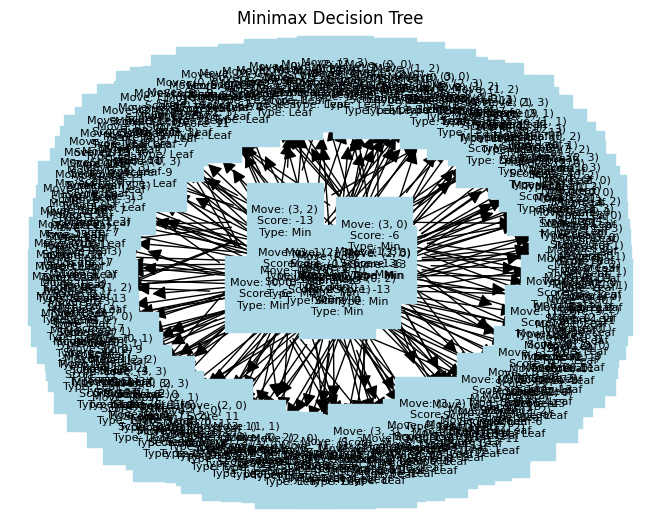

In [2]:
import copy
import pandas as pd  # Optional; for nice table output. Remove if not available.
import networkx as nx
import matplotlib.pyplot as plt

# Function: Calculate cell scores for a player
def calculate_cell_scores(board, player):
    board_size = len(board)
    scores = [[0 for _ in range(board_size)] for _ in range(board_size)]
    enemy = -player  # -1 for player 1, 1 for player -1
   
    # Horizontal lines
    for i in range(board_size):
        for j in range(board_size - 3):
            has_enemy = False
            for k in range(4):
                if board[i][j + k] == enemy:
                    has_enemy = True
                    break
            if not has_enemy:
                for p in range(4):
                    if board[i][j + p] != 0:  # Skip if cell is occupied
                        continue
                    cell_score = 1  # base score for open line
                    for k in range(4):
                        if k != p and board[i][j + k] == player:
                            dist = abs(p - k)
                            bonus = 4 - dist  # higher bonus for closer allies
                            cell_score += bonus
                    scores[i][j + p] += cell_score
   
    # Vertical lines
    for j in range(board_size):
        for i in range(board_size - 3):
            has_enemy = False
            for k in range(4):
                if board[i + k][j] == enemy:
                    has_enemy = True
                    break
            if not has_enemy:
                for p in range(4):
                    if board[i + p][j] != 0:  # Skip if cell is occupied
                        continue
                    cell_score = 1  # base score for open line
                    for k in range(4):
                        if k != p and board[i + k][j] == player:
                            dist = abs(p - k)
                            bonus = 4 - dist  # higher bonus for closer allies
                            cell_score += bonus
                    scores[i + p][j] += cell_score
   
    # Diagonal / (top-left to bottom-right)
    for i in range(board_size - 3):
        for j in range(board_size - 3):
            has_enemy = False
            for k in range(4):
                if board[i + k][j + k] == enemy:
                    has_enemy = True
                    break
            if not has_enemy:
                for p in range(4):
                    if board[i + p][j + p] != 0:  # Skip if cell is occupied
                        continue
                    cell_score = 1  # base score for open line
                    for k in range(4):
                        if k != p and board[i + k][j + k] == player:
                            dist = abs(p - k)
                            bonus = 4 - dist  # higher bonus for closer allies
                            cell_score += bonus
                    scores[i + p][j + p] += cell_score
   
    # Diagonal \ (top-right to bottom-left)
    for i in range(board_size - 3):
        for j in range(3, board_size):
            has_enemy = False
            for k in range(4):
                if board[i + k][j - k] == enemy:
                    has_enemy = True
                    break
            if not has_enemy:
                for p in range(4):
                    if board[i + p][j - p] != 0:  # Skip if cell is occupied
                        continue
                    cell_score = 1  # base score for open line
                    for k in range(4):
                        if k != p and board[i + k][j - k] == player:
                            dist = abs(p - k)
                            bonus = 4 - dist  # higher bonus for closer allies
                            cell_score += bonus
                    scores[i + p][j - p] += cell_score
   
    return scores

# Function: Check if a player has won (connect 4 in a row)
def check_win(board, player):
    board_size = len(board)
    
    # Horizontal
    for i in range(board_size):
        for j in range(board_size - 3):
            if all(board[i][j + k] == player for k in range(4)):
                return True
    
    # Vertical
    for j in range(board_size):
        for i in range(board_size - 3):
            if all(board[i + k][j] == player for k in range(4)):
                return True
    
    # Diagonal /
    for i in range(board_size - 3):
        for j in range(board_size - 3):
            if all(board[i + k][j + k] == player for k in range(4)):
                return True
    
    # Diagonal \
    for i in range(board_size - 3):
        for j in range(3, board_size):
            if all(board[i + k][j - k] == player for k in range(4)):
                return True
    
    return False

# Function: Evaluate the board using the scoring heuristic
def evaluate_board(board):
    human_scores = calculate_cell_scores(board, 1)
    computer_scores = calculate_cell_scores(board, -1)
    
    # Sum all cell scores for human and computer
    human_total = sum(sum(row) for row in human_scores)
    computer_total = sum(sum(row) for row in computer_scores)
    
    return human_total - computer_total

# Function: Get all valid moves (empty cells)
def get_valid_moves(board):
    board_size = len(board)
    moves = [(i, j) for i in range(board_size) for j in range(board_size) if board[i][j] == 0]
    # moves = moves[:2]  # Uncomment to limit moves per level for smaller trees/demos
    return moves

# Function: Build the minimax tree structure with unique IDs
def build_tree(board, depth, is_maximizing, current_player, node_id_counter=[0]):
    node_id = node_id_counter[0]
    node_id_counter[0] += 1
    
    if check_win(board, 1):
        return {'id': node_id, 'type': 'leaf', 'score': float('inf'), 'move': None, 'children': []}
    if check_win(board, -1):
        return {'id': node_id, 'type': 'leaf', 'score': float('-inf'), 'move': None, 'children': []}
    if not get_valid_moves(board):
        return {'id': node_id, 'type': 'leaf', 'score': 0, 'move': None, 'children': []}
    
    if depth == 0:
        return {'id': node_id, 'type': 'leaf', 'score': evaluate_board(board), 'move': None, 'children': []}
    
    node = {'id': node_id, 'type': 'node', 'is_max': is_maximizing, 'score': None, 'move': None, 'children': []}
    
    for move in get_valid_moves(board):
        new_board = copy.deepcopy(board)
        new_board[move[0]][move[1]] = current_player
        child = build_tree(new_board, depth - 1, not is_maximizing, -current_player, node_id_counter)
        child['move'] = move
        node['children'].append(child)
    
    # Compute node's score based on children
    if is_maximizing:
        node['score'] = max(child['score'] for child in node['children'])
    else:
        node['score'] = min(child['score'] for child in node['children'])
    
    return node

# Function: Flatten tree to rows for table (optional)
def get_tree_rows(node, depth=0, parent_move='Root', rows=None):
    if rows is None:
        rows = []
    move_str = str(node['move']) if node['move'] else 'Root'
    is_max_str = 'Yes' if node.get('is_max', False) else 'No' if 'is_max' in node else '-'
    score = node['score'] if node['score'] is not None else '-'
    rows.append({'Depth': depth, 'Parent Move': parent_move, 'Current Move': move_str, 'Is Maximizing': is_max_str, 'Score': score})
    for child in node['children']:
        get_tree_rows(child, depth + 1, move_str, rows)
    return rows

# Function: Draw minimax tree using NetworkX and Matplotlib
def draw_minimax_tree_networkx(tree):
    G = nx.DiGraph()
    labels = {}

    def add_nodes_edges(node):
        node_id = node['id']
        node_type = node['type']
        move_str = str(node['move']) if node['move'] else 'Root'
        score_str = str(node['score']) if node['score'] is not None else '-'
        is_max_str = 'Max' if node.get('is_max', False) else 'Min' if 'is_max' in node else 'Leaf'
        label = f"Move: {move_str}\nScore: {score_str}\nType: {is_max_str}"
        G.add_node(node_id, label=label)
        labels[node_id] = label
        for child in node['children']:
            G.add_edge(node_id, child['id'])
            add_nodes_edges(child)
    
    add_nodes_edges(tree)
    pos = nx.spring_layout(G, seed=42)  # Fixed seed for reproducible layout
    nx.draw(G, pos, with_labels=True, labels=labels, node_shape='s', node_color='lightblue', 
            node_size=3000, font_size=8, arrows=True, arrowsize=20)
    plt.title("Minimax Decision Tree")
    plt.savefig('minimax_tree_networkx.png', dpi=300, bbox_inches='tight')
    plt.show()

# Example usage
# Small 4x4 board for demo (uncomment move limit in get_valid_moves if tree is too large)
board = [[0 for _ in range(4)] for _ in range(4)]  # Small empty board

depth = 2
is_maximizing = True
current_player = 1

# Build the tree (with ID counter)
node_id_counter = [0]
tree = build_tree(board, depth, is_maximizing, current_player, node_id_counter)

# Optional: Print table
rows = get_tree_rows(tree)
if pd is not None:
    df = pd.DataFrame(rows)
    print(df.to_string(index=False))
else:
    print("Pandas not available. Skipping table output.")

# Draw the tree
draw_minimax_tree_networkx(tree)

In [1]:
import copy  # For deep copying the board in simulations

# Existing function from your code
def calculate_cell_scores(board, player):
    board_size = len(board)
    scores = [[0 for _ in range(board_size)] for _ in range(board_size)]
    enemy = -player  # -1 for player 1, 1 for player -1
   
    # Horizontal lines
    for i in range(board_size):
        for j in range(board_size - 3):
            has_enemy = False
            for k in range(4):
                if board[i][j + k] == enemy:
                    has_enemy = True
                    break
            if not has_enemy:
                for p in range(4):
                    if board[i][j + p] != 0:  # Skip if cell is occupied
                        continue
                    cell_score = 1  # base score for open line
                    for k in range(4):
                        if k != p and board[i][j + k] == player:
                            dist = abs(p - k)
                            bonus = 4 - dist  # higher bonus for closer allies
                            cell_score += bonus
                    scores[i][j + p] += cell_score
   
    # Vertical lines
    for j in range(board_size):
        for i in range(board_size - 3):
            has_enemy = False
            for k in range(4):
                if board[i + k][j] == enemy:
                    has_enemy = True
                    break
            if not has_enemy:
                for p in range(4):
                    if board[i + p][j] != 0:  # Skip if cell is occupied
                        continue
                    cell_score = 1  # base score for open line
                    for k in range(4):
                        if k != p and board[i + k][j] == player:
                            dist = abs(p - k)
                            bonus = 4 - dist  # higher bonus for closer allies
                            cell_score += bonus
                    scores[i + p][j] += cell_score
   
    # Diagonal / (top-left to bottom-right)
    for i in range(board_size - 3):
        for j in range(board_size - 3):
            has_enemy = False
            for k in range(4):
                if board[i + k][j + k] == enemy:
                    has_enemy = True
                    break
            if not has_enemy:
                for p in range(4):
                    if board[i + p][j + p] != 0:  # Skip if cell is occupied
                        continue
                    cell_score = 1  # base score for open line
                    for k in range(4):
                        if k != p and board[i + k][j + k] == player:
                            dist = abs(p - k)
                            bonus = 4 - dist  # higher bonus for closer allies
                            cell_score += bonus
                    scores[i + p][j + p] += cell_score
   
    # Diagonal \ (top-right to bottom-left)
    for i in range(board_size - 3):
        for j in range(3, board_size):
            has_enemy = False
            for k in range(4):
                if board[i + k][j - k] == enemy:
                    has_enemy = True
                    break
            if not has_enemy:
                for p in range(4):
                    if board[i + p][j - p] != 0:  # Skip if cell is occupied
                        continue
                    cell_score = 1  # base score for open line
                    for k in range(4):
                        if k != p and board[i + k][j - k] == player:
                            dist = abs(p - k)
                            bonus = 4 - dist  # higher bonus for closer allies
                            cell_score += bonus
                    scores[i + p][j - p] += cell_score
   
    return scores

# New function: Check if a player has won (connect 4 in a row)
def check_win(board, player):
    board_size = len(board)
    
    # Horizontal
    for i in range(board_size):
        for j in range(board_size - 3):
            if all(board[i][j + k] == player for k in range(4)):
                return True
    
    # Vertical
    for j in range(board_size):
        for i in range(board_size - 3):
            if all(board[i + k][j] == player for k in range(4)):
                return True
    
    # Diagonal /
    for i in range(board_size - 3):
        for j in range(board_size - 3):
            if all(board[i + k][j + k] == player for k in range(4)):
                return True
    
    # Diagonal \
    for i in range(board_size - 3):
        for j in range(3, board_size):
            if all(board[i + k][j - k] == player for k in range(4)):
                return True
    
    return False

# New function: Evaluate the board using the scoring heuristic
# Returns a single score: positive for player 1 advantage, negative for player -1
def evaluate_board(board):
    human_scores = calculate_cell_scores(board, 1)
    computer_scores = calculate_cell_scores(board, -1)
    
    # Sum all cell scores for human and computer
    human_total = sum(sum(row) for row in human_scores)
    computer_total = sum(sum(row) for row in computer_scores)
    
    return human_total - computer_total

# New function: Get all valid moves (empty cells)
def get_valid_moves(board):
    board_size = len(board)
    return [(i, j) for i in range(board_size) for j in range(board_size) if board[i][j] == 0]

# Minimax function with depth limit
# Assumes player 1 is maximizer, -1 is minimizer
# Returns the best score and best move
def minimax(board, depth, is_maximizing, current_player):
    # Check for terminal states
    if check_win(board, 1):
        return float('inf'), None  # Max player wins
    if check_win(board, -1):
        return float('-inf'), None  # Min player wins
    if not get_valid_moves(board):  # Board full, draw
        return 0, None
    
    # Base case: depth reached, evaluate
    if depth == 0:
        return evaluate_board(board), None
    
    best_move = None
    if is_maximizing:  # Maximizing player (player 1)
        max_eval = float('-inf')
        for move in get_valid_moves(board):
            # Simulate move
            new_board = copy.deepcopy(board)
            new_board[move[0]][move[1]] = 1  # Place player 1's piece
            
            # Recurse
            eval_score, _ = minimax(new_board, depth - 1, False, -1)
            if eval_score > max_eval:
                max_eval = eval_score
                best_move = move
        return max_eval, best_move
    else:  # Minimizing player (player -1)
        min_eval = float('inf')
        for move in get_valid_moves(board):
            # Simulate move
            new_board = copy.deepcopy(board)
            new_board[move[0]][move[1]] = -1  # Place player -1's piece
            
            # Recurse
            eval_score, _ = minimax(new_board, depth - 1, True, 1)
            if eval_score < min_eval:
                min_eval = eval_score
                best_move = move
        return min_eval, best_move

# New function: Show each possible move with its minimax score (evidence)
def show_possible_moves_with_evidence(board, depth, is_maximizing, current_player):
    valid_moves = get_valid_moves(board)
    move_evidences = []
    
    print(f"Evaluating {len(valid_moves)} possible moves at depth {depth}...")
    
    for move in valid_moves:
        # Simulate the move
        new_board = copy.deepcopy(board)
        new_board[move[0]][move[1]] = current_player
        
        # Get the minimax score for this move (evidence)
        score, _ = minimax(new_board, depth - 1, not is_maximizing, -current_player)
        
        move_evidences.append((move, score))
        
        # Print evidence for this move
        print(f"Move {move} (row {move[0]}, col {move[1]}): Minimax score = {score}")
    
    # Sort by score (descending for maximizer, ascending for minimizer)
    if is_maximizing:
        move_evidences.sort(key=lambda x: x[1], reverse=True)
    else:
        move_evidences.sort(key=lambda x: x[1])
    
    # Show top moves
    print("\nTop 5 moves ranked by score:")
    for i, (move, score) in enumerate(move_evidences[:5]):
        print(f"{i+1}. Move {move}: Score = {score} (Evidence: Minimax evaluation after opponent's best response)")
    
    # Best move
    best_move = move_evidences[0][0]
    best_score = move_evidences[0][1]
    print(f"\nBest move: {best_move} with score {best_score}")
    
    return best_score, best_move

# Example usage
# Assuming it's player 1's turn (maximizing)
board = [
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, -1, -1, 0, 0],
    [0, 0, 1, 1, 0, 0],
    [0, 0, 1, -1, 0, 0],
    [0, 0, 1, -1, 0, 0]
]

depth = 3  # Reduced to 3 for feasibility (depth 5 is too slow on 6x6 with ~30 empty cells)
is_maximizing = True  # Assuming human (1) turn
current_player = 1

# Show each move and evidence
best_score, best_move = show_possible_moves_with_evidence(board, depth, is_maximizing, current_player)

# Optional: Run full minimax for comparison (may be slow)
print("\n--- Full Minimax (for comparison, limited depth) ---")
full_score, full_move = minimax(board, depth, is_maximizing, current_player)
print(f"Best score: {full_score}")
print(f"Best move: {full_move}")

Evaluating 28 possible moves at depth 3...
Move (0, 0) (row 0, col 0): Minimax score = 4
Move (0, 1) (row 0, col 1): Minimax score = 26
Move (0, 2) (row 0, col 2): Minimax score = 28
Move (0, 3) (row 0, col 3): Minimax score = 26
Move (0, 4) (row 0, col 4): Minimax score = 28
Move (0, 5) (row 0, col 5): Minimax score = 4
Move (1, 0) (row 1, col 0): Minimax score = 10
Move (1, 1) (row 1, col 1): Minimax score = 10
Move (1, 2) (row 1, col 2): Minimax score = 35
Move (1, 3) (row 1, col 3): Minimax score = 45
Move (1, 4) (row 1, col 4): Minimax score = 23
Move (1, 5) (row 1, col 5): Minimax score = 10
Move (2, 0) (row 2, col 0): Minimax score = 27
Move (2, 1) (row 2, col 1): Minimax score = 45
Move (2, 4) (row 2, col 4): Minimax score = inf
Move (2, 5) (row 2, col 5): Minimax score = 24
Move (3, 0) (row 3, col 0): Minimax score = 29
Move (3, 1) (row 3, col 1): Minimax score = inf
Move (3, 4) (row 3, col 4): Minimax score = inf
Move (3, 5) (row 3, col 5): Minimax score = 29
Move (4, 0) (row

In [2]:
import copy  # For deep copying the board in simulations

# Function to print the board nicely
def print_board(board):
    board_size = len(board)
    symbols = {0: '.', 1: 'X', -1: 'O'}  # X for player 1, O for player -1
    print("\nCurrent Board:")
    for i in range(board_size):
        row_str = ' '.join([symbols[board[i][j]] for j in range(board_size)])
        print(f"Row {i}: {row_str}")
    print("-" * (board_size * 2 + 4))  # Separator

# Existing function from your code
def calculate_cell_scores(board, player):
    board_size = len(board)
    scores = [[0 for _ in range(board_size)] for _ in range(board_size)]
    enemy = -player  # -1 for player 1, 1 for player -1
   
    # Horizontal lines
    for i in range(board_size):
        for j in range(board_size - 3):
            has_enemy = False
            for k in range(4):
                if board[i][j + k] == enemy:
                    has_enemy = True
                    break
            if not has_enemy:
                for p in range(4):
                    if board[i][j + p] != 0:  # Skip if cell is occupied
                        continue
                    cell_score = 1  # base score for open line
                    for k in range(4):
                        if k != p and board[i][j + k] == player:
                            dist = abs(p - k)
                            bonus = 4 - dist  # higher bonus for closer allies
                            cell_score += bonus
                    scores[i][j + p] += cell_score
   
    # Vertical lines
    for j in range(board_size):
        for i in range(board_size - 3):
            has_enemy = False
            for k in range(4):
                if board[i + k][j] == enemy:
                    has_enemy = True
                    break
            if not has_enemy:
                for p in range(4):
                    if board[i + p][j] != 0:  # Skip if cell is occupied
                        continue
                    cell_score = 1  # base score for open line
                    for k in range(4):
                        if k != p and board[i + k][j] == player:
                            dist = abs(p - k)
                            bonus = 4 - dist  # higher bonus for closer allies
                            cell_score += bonus
                    scores[i + p][j] += cell_score
   
    # Diagonal / (top-left to bottom-right)
    for i in range(board_size - 3):
        for j in range(board_size - 3):
            has_enemy = False
            for k in range(4):
                if board[i + k][j + k] == enemy:
                    has_enemy = True
                    break
            if not has_enemy:
                for p in range(4):
                    if board[i + p][j + p] != 0:  # Skip if cell is occupied
                        continue
                    cell_score = 1  # base score for open line
                    for k in range(4):
                        if k != p and board[i + k][j + k] == player:
                            dist = abs(p - k)
                            bonus = 4 - dist  # higher bonus for closer allies
                            cell_score += bonus
                    scores[i + p][j + p] += cell_score
   
    # Diagonal \ (top-right to bottom-left)
    for i in range(board_size - 3):
        for j in range(3, board_size):
            has_enemy = False
            for k in range(4):
                if board[i + k][j - k] == enemy:
                    has_enemy = True
                    break
            if not has_enemy:
                for p in range(4):
                    if board[i + p][j - p] != 0:  # Skip if cell is occupied
                        continue
                    cell_score = 1  # base score for open line
                    for k in range(4):
                        if k != p and board[i + k][j - k] == player:
                            dist = abs(p - k)
                            bonus = 4 - dist  # higher bonus for closer allies
                            cell_score += bonus
                    scores[i + p][j - p] += cell_score
   
    return scores

# New function: Check if a player has won (connect 4 in a row)
def check_win(board, player):
    board_size = len(board)
    
    # Horizontal
    for i in range(board_size):
        for j in range(board_size - 3):
            if all(board[i][j + k] == player for k in range(4)):
                return True
    
    # Vertical
    for j in range(board_size):
        for i in range(board_size - 3):
            if all(board[i + k][j] == player for k in range(4)):
                return True
    
    # Diagonal /
    for i in range(board_size - 3):
        for j in range(board_size - 3):
            if all(board[i + k][j + k] == player for k in range(4)):
                return True
    
    # Diagonal \
    for i in range(board_size - 3):
        for j in range(3, board_size):
            if all(board[i + k][j - k] == player for k in range(4)):
                return True
    
    return False

# New function: Check if board is full (draw)
def is_board_full(board):
    return len(get_valid_moves(board)) == 0

# New function: Evaluate the board using the scoring heuristic
# Returns a single score: positive for player 1 advantage, negative for player -1
def evaluate_board(board):
    human_scores = calculate_cell_scores(board, 1)
    computer_scores = calculate_cell_scores(board, -1)
    
    # Sum all cell scores for human and computer
    human_total = sum(sum(row) for row in human_scores)
    computer_total = sum(sum(row) for row in computer_scores)
    
    return human_total - computer_total

# New function: Get all valid moves (empty cells)
def get_valid_moves(board):
    board_size = len(board)
    return [(i, j) for i in range(board_size) for j in range(board_size) if board[i][j] == 0]

# Minimax function with depth limit
# Assumes player 1 is maximizer, -1 is minimizer
# Returns the best score and best move
def minimax(board, depth, is_maximizing, current_player):
    # Check for terminal states
    if check_win(board, 1):
        return float('inf'), None  # Max player wins
    if check_win(board, -1):
        return float('-inf'), None  # Min player wins
    if not get_valid_moves(board):  # Board full, draw
        return 0, None
    
    # Base case: depth reached, evaluate
    if depth == 0:
        return evaluate_board(board), None
    
    best_move = None
    if is_maximizing:  # Maximizing player (player 1)
        max_eval = float('-inf')
        for move in get_valid_moves(board):
            # Simulate move
            new_board = copy.deepcopy(board)
            new_board[move[0]][move[1]] = 1  # Place player 1's piece
            
            # Recurse
            eval_score, _ = minimax(new_board, depth - 1, False, -1)
            if eval_score > max_eval:
                max_eval = eval_score
                best_move = move
        return max_eval, best_move
    else:  # Minimizing player (player -1)
        min_eval = float('inf')
        for move in get_valid_moves(board):
            # Simulate move
            new_board = copy.deepcopy(board)
            new_board[move[0]][move[1]] = -1  # Place player -1's piece
            
            # Recurse
            eval_score, _ = minimax(new_board, depth - 1, True, 1)
            if eval_score < min_eval:
                min_eval = eval_score
                best_move = move
        return min_eval, best_move

# New function: Show each possible move with its minimax score (evidence)
def show_possible_moves_with_evidence(board, depth, is_maximizing, current_player):
    valid_moves = get_valid_moves(board)
    move_evidences = []
    
    print(f"Evaluating {len(valid_moves)} possible moves at depth {depth}...")
    
    for move in valid_moves:
        # Simulate the move
        new_board = copy.deepcopy(board)
        new_board[move[0]][move[1]] = current_player
        
        # Get the minimax score for this move (evidence)
        score, _ = minimax(new_board, depth - 1, not is_maximizing, -current_player)
        
        move_evidences.append((move, score))
        
        # Print evidence for this move
        print(f"Move {move} (row {move[0]}, col {move[1]}): Minimax score = {score}")
    
    # Sort by score (descending for maximizer, ascending for minimizer)
    if is_maximizing:
        move_evidences.sort(key=lambda x: x[1], reverse=True)
    else:
        move_evidences.sort(key=lambda x: x[1])
    
    # Show top moves
    print("\nTop 5 moves ranked by score:")
    for i, (move, score) in enumerate(move_evidences[:5]):
        print(f"{i+1}. Move {move}: Score = {score} (Evidence: Minimax evaluation after opponent's best response)")
    
    # Best move
    best_move = move_evidences[0][0]
    best_score = move_evidences[0][1]
    print(f"\nBest move: {best_move} with score {best_score}")
    
    return best_score, best_move

# New function: Simulate game steps using minimax for both players
def simulate_game_steps(board, depth, max_steps=10):
    current_board = copy.deepcopy(board)
    current_player = 1  # Start with player 1
    is_maximizing = True
    step = 0
    
    print(f"Starting simulation with depth {depth}. Max steps: {max_steps}")
    print_board(current_board)
    
    while step < max_steps:
        step += 1
        player_name = "Player 1 (X)" if current_player == 1 else "Player -1 (O)"
        print(f"\n--- Step {step}: {player_name}'s turn ---")
        
        # Check for win or draw before move
        if check_win(current_board, 1):
            print("Player 1 wins!")
            break
        if check_win(current_board, -1):
            print("Player -1 wins!")
            break
        if is_board_full(current_board):
            print("It's a draw!")
            break
        
        # Show possible moves and evidence
        best_score, best_move = show_possible_moves_with_evidence(current_board, depth, is_maximizing, current_player)
        
        # Make the best move
        current_board[best_move[0]][best_move[1]] = current_player
        print(f"{player_name} plays at {best_move} (row {best_move[0]}, col {best_move[1]}) with score {best_score}")
        
        # Print updated board
        print_board(current_board)
        
        # Switch players
        current_player = -current_player
        is_maximizing = not is_maximizing
    
    print(f"\nSimulation ended after {step} steps.")

# Example usage
# Assuming it's player 1's turn (maximizing)
board = [
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, -1, -1, 0, 0],
    [0, 0, 1, 1, 0, 0],
    [0, 0, 1, -1, 0, 0],
    [0, 0, 1, -1, 0, 0]
]

depth = 2  # Depth 3 for feasibility (higher depths may be slow)
max_steps = 6  # Limit simulation steps to avoid long runtime

# Simulate the game steps
simulate_game_steps(board, depth, max_steps)

Starting simulation with depth 2. Max steps: 6

Current Board:
Row 0: . . . . . .
Row 1: . . . . . .
Row 2: . . O O . .
Row 3: . . X X . .
Row 4: . . X O . .
Row 5: . . X O . .
----------------

--- Step 1: Player 1 (X)'s turn ---
Evaluating 28 possible moves at depth 2...
Move (0, 0) (row 0, col 0): Minimax score = -60
Move (0, 1) (row 0, col 1): Minimax score = -38
Move (0, 2) (row 0, col 2): Minimax score = -36
Move (0, 3) (row 0, col 3): Minimax score = -38
Move (0, 4) (row 0, col 4): Minimax score = -36
Move (0, 5) (row 0, col 5): Minimax score = -60
Move (1, 0) (row 1, col 0): Minimax score = -49
Move (1, 1) (row 1, col 1): Minimax score = -38
Move (1, 2) (row 1, col 2): Minimax score = -14
Move (1, 3) (row 1, col 3): Minimax score = -14
Move (1, 4) (row 1, col 4): Minimax score = -36
Move (1, 5) (row 1, col 5): Minimax score = -49
Move (2, 0) (row 2, col 0): Minimax score = -37
Move (2, 1) (row 2, col 1): Minimax score = -19
Move (2, 4) (row 2, col 4): Minimax score = -19
Move (

In [8]:
import copy  # For deep copying the board in simulations
import sys

# Function to print the board nicely (with file support)
def print_board(board, output_file=None):
    board_size = len(board)
    symbols = {0: '.', 1: 'X', -1: 'O'}  # X for player 1, O for player -1
    output = f"\nCurrent Board:\n"
    for i in range(board_size):
        row_str = ' '.join([symbols[board[i][j]] for j in range(board_size)])
        output += f"Row {i}: {row_str}\n"
    output += "-" * (board_size * 2 + 4) + "\n"  # Separator
    
    if output_file is not None:
        output_file.write(output)
        output_file.flush()
    else:
        print(output)

# Existing function from your code
def calculate_cell_scores(board, player):
    board_size = len(board)
    scores = [[0 for _ in range(board_size)] for _ in range(board_size)]
    enemy = -player  # -1 for player 1, 1 for player -1
   
    # Horizontal lines
    for i in range(board_size):
        for j in range(board_size - 3):
            has_enemy = False
            for k in range(4):
                if board[i][j + k] == enemy:
                    has_enemy = True
                    break
            if not has_enemy:
                for p in range(4):
                    if board[i][j + p] != 0:  # Skip if cell is occupied
                        continue
                    cell_score = 1  # base score for open line
                    for k in range(4):
                        if k != p and board[i][j + k] == player:
                            dist = abs(p - k)
                            bonus = 4 - dist  # higher bonus for closer allies
                            cell_score += bonus
                    scores[i][j + p] += cell_score
   
    # Vertical lines
    for j in range(board_size):
        for i in range(board_size - 3):
            has_enemy = False
            for k in range(4):
                if board[i + k][j] == enemy:
                    has_enemy = True
                    break
            if not has_enemy:
                for p in range(4):
                    if board[i + p][j] != 0:  # Skip if cell is occupied
                        continue
                    cell_score = 1  # base score for open line
                    for k in range(4):
                        if k != p and board[i + k][j] == player:
                            dist = abs(p - k)
                            bonus = 4 - dist  # higher bonus for closer allies
                            cell_score += bonus
                    scores[i + p][j] += cell_score
   
    # Diagonal / (top-left to bottom-right)
    for i in range(board_size - 3):
        for j in range(board_size - 3):
            has_enemy = False
            for k in range(4):
                if board[i + k][j + k] == enemy:
                    has_enemy = True
                    break
            if not has_enemy:
                for p in range(4):
                    if board[i + p][j + p] != 0:  # Skip if cell is occupied
                        continue
                    cell_score = 1  # base score for open line
                    for k in range(4):
                        if k != p and board[i + k][j + k] == player:
                            dist = abs(p - k)
                            bonus = 4 - dist  # higher bonus for closer allies
                            cell_score += bonus
                    scores[i + p][j + p] += cell_score
   
    # Diagonal \ (top-right to bottom-left)
    for i in range(board_size - 3):
        for j in range(3, board_size):
            has_enemy = False
            for k in range(4):
                if board[i + k][j - k] == enemy:
                    has_enemy = True
                    break
            if not has_enemy:
                for p in range(4):
                    if board[i + p][j - p] != 0:  # Skip if cell is occupied
                        continue
                    cell_score = 1  # base score for open line
                    for k in range(4):
                        if k != p and board[i + k][j - k] == player:
                            dist = abs(p - k)
                            bonus = 4 - dist  # higher bonus for closer allies
                            cell_score += bonus
                    scores[i + p][j - p] += cell_score
   
    return scores

# New function: Check if a player has won (connect 4 in a row)
def check_win(board, player):
    board_size = len(board)
    
    # Horizontal
    for i in range(board_size):
        for j in range(board_size - 3):
            if all(board[i][j + k] == player for k in range(4)):
                return True
    
    # Vertical
    for j in range(board_size):
        for i in range(board_size - 3):
            if all(board[i + k][j] == player for k in range(4)):
                return True
    
    # Diagonal /
    for i in range(board_size - 3):
        for j in range(board_size - 3):
            if all(board[i + k][j + k] == player for k in range(4)):
                return True
    
    # Diagonal \
    for i in range(board_size - 3):
        for j in range(3, board_size):
            if all(board[i + k][j - k] == player for k in range(4)):
                return True
    
    return False

# New function: Check if board is full (draw)
def is_board_full(board):
    return len(get_valid_moves(board)) == 0

# New function: Evaluate the board using the scoring heuristic
# Returns a single score: positive for player 1 advantage, negative for player -1
def evaluate_board(board):
    human_scores = calculate_cell_scores(board, 1)
    computer_scores = calculate_cell_scores(board, -1)
    
    # Sum all cell scores for human and computer
    human_total = sum(sum(row) for row in human_scores)
    computer_total = sum(sum(row) for row in computer_scores)
    
    return human_total - computer_total

# New function: Get all valid moves (empty cells)
def get_valid_moves(board):
    board_size = len(board)
    return [(i, j) for i in range(board_size) for j in range(board_size) if board[i][j] == 0]

# Minimax function with depth limit
# Assumes player 1 is maximizer, -1 is minimizer
# Returns the best score and best move
def minimax(board, depth, is_maximizing, current_player):
    # Check for terminal states
    if check_win(board, 1):
        return float('inf'), None  # Max player wins
    if check_win(board, -1):
        return float('-inf'), None  # Min player wins
    if not get_valid_moves(board):  # Board full, draw
        return 0, None
    
    # Base case: depth reached, evaluate
    if depth == 0:
        return evaluate_board(board), None
    
    best_move = None
    if is_maximizing:  # Maximizing player (player 1)
        max_eval = float('-inf')
        for move in get_valid_moves(board):
            # Simulate move
            new_board = copy.deepcopy(board)
            new_board[move[0]][move[1]] = 1  # Place player 1's piece
            
            # Recurse
            eval_score, _ = minimax(new_board, depth - 1, False, -1)
            if eval_score > max_eval:
                max_eval = eval_score
                best_move = move
        return max_eval, best_move
    else:  # Minimizing player (player -1)
        min_eval = float('inf')
        for move in get_valid_moves(board):
            # Simulate move
            new_board = copy.deepcopy(board)
            new_board[move[0]][move[1]] = -1  # Place player -1's piece
            
            # Recurse
            eval_score, _ = minimax(new_board, depth - 1, True, 1)
            if eval_score < min_eval:
                min_eval = eval_score
                best_move = move
        return min_eval, best_move

# New function: Show each possible move with its minimax score (evidence), with file support
def show_possible_moves_with_evidence(board, depth, is_maximizing, current_player, output_file=None):
    valid_moves = get_valid_moves(board)
    move_evidences = []
    
    output = f"Evaluating {len(valid_moves)} possible moves at depth {depth}...\n"
    
    if output_file is not None:
        output_file.write(output)
        output_file.flush()
    else:
        print(output)
    
    for move in valid_moves:
        # Simulate the move
        new_board = copy.deepcopy(board)
        new_board[move[0]][move[1]] = current_player
        
        # Get the minimax score for this move (evidence)
        score, _ = minimax(new_board, depth - 1, not is_maximizing, -current_player)
        
        move_evidences.append((move, score))
        
        # Print evidence for this move
        move_output = f"Move {move} (row {move[0]}, col {move[1]}): Minimax score = {score}\n"
        if output_file is not None:
            output_file.write(move_output)
            output_file.flush()
        else:
            print(move_output)
    
    # Sort by score (descending for maximizer, ascending for minimizer)
    if is_maximizing:
        move_evidences.sort(key=lambda x: x[1], reverse=True)
    else:
        move_evidences.sort(key=lambda x: x[1])
    
    # Show top moves
    output = "\nTop 5 moves ranked by score:\n"
    if output_file is not None:
        output_file.write(output)
        output_file.flush()
    else:
        print(output)
    
    for i, (move, score) in enumerate(move_evidences[:5]):
        move_output = f"{i+1}. Move {move}: Score = {score} (Evidence: Minimax evaluation after opponent's best response)\n"
        if output_file is not None:
            output_file.write(move_output)
            output_file.flush()
        else:
            print(move_output)
    
    # Best move
    best_move = move_evidences[0][0]
    best_score = move_evidences[0][1]
    best_output = f"\nBest move: {best_move} with score {best_score}\n"
    if output_file is not None:
        output_file.write(best_output)
        output_file.flush()
    else:
        print(best_output)
    
    return best_score, best_move

# New function: Simulate game steps using minimax for both players, with file output
def simulate_game_steps(board, depth, max_steps=10, output_filename="simulation_output.txt"):
    current_board = copy.deepcopy(board)
    current_player = 1  # Start with player 1
    is_maximizing = True
    step = 0
    
    # Open file for writing
    with open(output_filename, 'w') as output_file:
        output = f"Starting simulation with depth {depth}. Max steps: {max_steps}\n"
        output_file.write(output)
        output_file.flush()
        
        print_board(current_board, output_file)
        
        while step < max_steps:
            step += 1
            player_name = "Player 1 (X)" if current_player == 1 else "Player -1 (O)"
            step_output = f"\n--- Step {step}: {player_name}'s turn ---\n"
            output_file.write(step_output)
            output_file.flush()
            
            # Check for win or draw before move
            if check_win(current_board, 1):
                win_output = "Player 1 wins!\n"
                output_file.write(win_output)
                output_file.flush()
                print(win_output.strip())
                break
            if check_win(current_board, -1):
                win_output = "Player -1 wins!\n"
                output_file.write(win_output)
                output_file.flush()
                print(win_output.strip())
                break
            if is_board_full(current_board):
                draw_output = "It's a draw!\n"
                output_file.write(draw_output)
                output_file.flush()
                print(draw_output.strip())
                break
            
            # Show possible moves and evidence
            best_score, best_move = show_possible_moves_with_evidence(current_board, depth, is_maximizing, current_player, output_file)
            
            # Make the best move
            current_board[best_move[0]][best_move[1]] = current_player
            move_output = f"{player_name} plays at {best_move} (row {best_move[0]}, col {best_move[1]}) with score {best_score}\n"
            output_file.write(move_output)
            output_file.flush()
            print(move_output.strip())
            
            # Print updated board
            print_board(current_board, output_file)
            
            # Switch players
            current_player = -current_player
            is_maximizing = not is_maximizing
        
        final_output = f"\nSimulation ended after {step} steps.\n"
        output_file.write(final_output)
        output_file.flush()
    
    print(f"\nSimulation output saved to '{output_filename}'")

# Example usage
# Assuming it's player 1's turn (maximizing)
board = [
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, -1, -1, 0, 0],
    [0, 0, 1, 1, 0, 0],
    [0, 0, 1, -1, 0, 0],
    [0, 0, 1, -1, 0, 0]
]

depth = 4  # Depth 3 for feasibility (higher depths may be slow)
max_steps = 6  # Limit simulation steps to avoid long runtime

# Simulate the game steps and write to TXT file
simulate_game_steps(board, depth, max_steps, "connect4_simulation.txt")

Player 1 (X) plays at (2, 4) (row 2, col 4) with score inf
Player -1 (O) plays at (0, 0) (row 0, col 0) with score inf
Player 1 (X) plays at (0, 1) (row 0, col 1) with score inf
Player -1 (O) plays at (0, 2) (row 0, col 2) with score inf
Player 1 (X) plays at (0, 3) (row 0, col 3) with score inf
Player -1 (O) plays at (0, 4) (row 0, col 4) with score inf

Simulation output saved to 'connect4_simulation.txt'


In [2]:
import copy
import sys

def print_board(board, output_file=None):
    board_size = len(board)
    symbols = {0: '.', 1: 'X', -1: 'O'}
    output = f"\nCurrent Board:\n"
    for i in range(board_size):
        row_str = ' '.join([symbols[board[i][j]] for j in range(board_size)])
        output += f"Row {i}: {row_str}\n"
    output += "-" * (board_size * 2 + 4) + "\n"
   
    if output_file is not None:
        output_file.write(output)
        output_file.flush()
    else:
        print(output)

def calculate_cell_scores(board, player):
    board_size = len(board)
    scores = [[0 for _ in range(board_size)] for _ in range(board_size)]
    enemy = -player
  
    for i in range(board_size):
        for j in range(board_size - 3):
            has_enemy = False
            for k in range(4):
                if board[i][j + k] == enemy:
                    has_enemy = True
                    break
            if not has_enemy:
                for p in range(4):
                    if board[i][j + p] != 0:
                        continue
                    cell_score = 1
                    for k in range(4):
                        if k != p and board[i][j + k] == player:
                            dist = abs(p - k)
                            bonus = 4 - dist
                            cell_score += bonus
                    scores[i][j + p] += cell_score
  
    for j in range(board_size):
        for i in range(board_size - 3):
            has_enemy = False
            for k in range(4):
                if board[i + k][j] == enemy:
                    has_enemy = True
                    break
            if not has_enemy:
                for p in range(4):
                    if board[i + p][j] != 0:
                        continue
                    cell_score = 1
                    for k in range(4):
                        if k != p and board[i + k][j] == player:
                            dist = abs(p - k)
                            bonus = 4 - dist
                            cell_score += bonus
                    scores[i + p][j] += cell_score
  
    for i in range(board_size - 3):
        for j in range(board_size - 3):
            has_enemy = False
            for k in range(4):
                if board[i + k][j + k] == enemy:
                    has_enemy = True
                    break
            if not has_enemy:
                for p in range(4):
                    if board[i + p][j + p] != 0:
                        continue
                    cell_score = 1
                    for k in range(4):
                        if k != p and board[i + k][j + k] == player:
                            dist = abs(p - k)
                            bonus = 4 - dist
                            cell_score += bonus
                    scores[i + p][j + p] += cell_score
  
    for i in range(board_size - 3):
        for j in range(3, board_size):
            has_enemy = False
            for k in range(4):
                if board[i + k][j - k] == enemy:
                    has_enemy = True
                    break
            if not has_enemy:
                for p in range(4):
                    if board[i + p][j - p] != 0:
                        continue
                    cell_score = 1
                    for k in range(4):
                        if k != p and board[i + k][j - k] == player:
                            dist = abs(p - k)
                            bonus = 4 - dist
                            cell_score += bonus
                    scores[i + p][j - p] += cell_score
  
    return scores

def check_win(board, player):
    board_size = len(board)
   
    for i in range(board_size):
        for j in range(board_size - 3):
            if all(board[i][j + k] == player for k in range(4)):
                return True
   
    for j in range(board_size):
        for i in range(board_size - 3):
            if all(board[i + k][j] == player for k in range(4)):
                return True
   
    for i in range(board_size - 3):
        for j in range(board_size - 3):
            if all(board[i + k][j + k] == player for k in range(4)):
                return True
   
    for i in range(board_size - 3):
        for j in range(3, board_size):
            if all(board[i + k][j - k] == player for k in range(4)):
                return True
   
    return False

def is_board_full(board):
    return len(get_valid_moves(board)) == 0

def evaluate_board(board):
    human_scores = calculate_cell_scores(board, 1)
    computer_scores = calculate_cell_scores(board, -1)
   
    human_total = sum(sum(row) for row in human_scores)
    computer_total = sum(sum(row) for row in computer_scores)
   
    return human_total - computer_total

def get_valid_moves(board):
    board_size = len(board)
    return [(i, j) for i in range(board_size) for j in range(board_size) if board[i][j] == 0]

def minimax(board, depth, is_maximizing, current_player):
    # Check for terminal states
    if check_win(board, 1):
        return 10000, None # Large positive score for player 1 win
    if check_win(board, -1):
        return -10000, None # Large negative score for player -1 win
    if not get_valid_moves(board):
        return 0, None
   
    if depth == 0:
        return evaluate_board(board), None
   
    best_move = None
    if is_maximizing:
        max_eval = -1000000
        for move in get_valid_moves(board):
            new_board = copy.deepcopy(board)
            new_board[move[0]][move[1]] = 1
            eval_score, _ = minimax(new_board, depth - 1, False, -1)
            if eval_score > max_eval:
                max_eval = eval_score
                best_move = move
        return max_eval, best_move
    else:
        min_eval = 1000000
        for move in get_valid_moves(board):
            new_board = copy.deepcopy(board)
            new_board[move[0]][move[1]] = -1
            eval_score, _ = minimax(new_board, depth - 1, True, 1)
            if eval_score < min_eval:
                min_eval = eval_score
                best_move = move
        return min_eval, best_move

def show_possible_moves_with_evidence(board, depth, is_maximizing, current_player, output_file=None):
    valid_moves = get_valid_moves(board)
    move_evidences = []
   
    output = f"Evaluating {len(valid_moves)} possible moves at depth {depth}...\n"
   
    if output_file is not None:
        output_file.write(output)
        output_file.flush()
    else:
        print(output)
   
    for move in valid_moves:
        new_board = copy.deepcopy(board)
        new_board[move[0]][move[1]] = current_player
        score, _ = minimax(new_board, depth - 1, not is_maximizing, -current_player)
        move_evidences.append((move, score))
        move_output = f"Move {move} (row {move[0]}, col {move[1]}): Minimax score = {score}\n"
        if output_file is not None:
            output_file.write(move_output)
            output_file.flush()
        else:
            print(move_output)
   
    if is_maximizing:
        move_evidences.sort(key=lambda x: x[1], reverse=True)
    else:
        move_evidences.sort(key=lambda x: x[1])
   
    output = "\nTop 5 moves ranked by score:\n"
    if output_file is not None:
        output_file.write(output)
        output_file.flush()
    else:
        print(output)
   
    for i, (move, score) in enumerate(move_evidences[:5]):
        move_output = f"{i+1}. Move {move}: Score = {score} (Evidence: Minimax evaluation after opponent's best response)\n"
        if output_file is not None:
            output_file.write(move_output)
            output_file.flush()
        else:
            print(move_output)
   
    best_move = move_evidences[0][0]
    best_score = move_evidences[0][1]
    best_output = f"\nBest move: {best_move} with score {best_score}\n"
    if output_file is not None:
        output_file.write(best_output)
        output_file.flush()
    else:
        print(best_output)
   
    return best_score, best_move

def simulate_game_steps(board, depth, max_steps=10, output_filename="simulation_output.txt"):
    current_board = copy.deepcopy(board)
    current_player = 1
    is_maximizing = True
    step = 0
   
    with open(output_filename, 'w') as output_file:
        output = f"Starting simulation with depth {depth}. Max steps: {max_steps}\n"
        output_file.write(output)
        output_file.flush()
        print_board(current_board, output_file)
       
        while step < max_steps:
            step += 1
            player_name = "Player 1 (X)" if current_player == 1 else "Player -1 (O)"
            step_output = f"\n--- Step {step}: {player_name}'s turn ---\n"
            output_file.write(step_output)
            output_file.flush()
           
            if check_win(current_board, 1):
                win_output = "Player 1 wins!\n"
                output_file.write(win_output)
                output_file.flush()
                print(win_output.strip())
                break
            if check_win(current_board, -1):
                win_output = "Player -1 wins!\n"
                output_file.write(win_output)
                output_file.flush()
                print(win_output.strip())
                break
            if is_board_full(current_board):
                draw_output = "It's a draw!\n"
                output_file.write(draw_output)
                output_file.flush()
                print(draw_output.strip())
                break
           
            best_score, best_move = show_possible_moves_with_evidence(current_board, depth, is_maximizing, current_player, output_file)
            current_board[best_move[0]][best_move[1]] = current_player
            move_output = f"{player_name} plays at {best_move} (row {best_move[0]}, col {best_move[1]}) with score {best_score}\n"
            output_file.write(move_output)
            output_file.flush()
            print(move_output.strip())
           
            print_board(current_board, output_file)
           
            current_player = -current_player
            is_maximizing = not is_maximizing
       
        final_output = f"\nSimulation ended after {step} steps.\n"
        output_file.write(final_output)
        output_file.flush()
   
    print(f"\nSimulation output saved to '{output_filename}'")

board = [
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, -1, -1, 0, 0],
    [0, 0, 1, 1, 0, 0],
    [0, 0, 1, -1, 0, 0],
    [0, 0, 1, -1, 0, 0]
]
depth = 3
max_steps = 4
simulate_game_steps(board, depth, max_steps, "connect4_simulation.txt")

Player 1 (X) plays at (2, 4) (row 2, col 4) with score 10000
Player -1 (O) plays at (0, 0) (row 0, col 0) with score 10000
Player 1 (X) plays at (0, 1) (row 0, col 1) with score 10000
Player -1 (O) plays at (0, 2) (row 0, col 2) with score 10000

Simulation output saved to 'connect4_simulation.txt'


In [ ]:
import copy
import sys

def print_board(board, output_file=None):
    board_size = len(board)
    symbols = {0: '.', 1: 'X', -1: 'O'}
    output = f"\nCurrent Board:\n"
    for i in range(board_size):
        row_str = ' '.join([symbols[board[i][j]] for j in range(board_size)])
        output += f"Row {i}: {row_str}\n"
    output += "-" * (board_size * 2 + 4) + "\n"
   
    if output_file is not None:
        output_file.write(output)
        output_file.flush()
    else:
        print(output)




def calculate_cell_scores(board, player):
    board_size = len(board)
    scores = [[0 for _ in range(board_size)] for _ in range(board_size)]
    enemy = -player
  
    for i in range(board_size):
        for j in range(board_size - 3):
            has_enemy = False
            for k in range(4):
                if board[i][j + k] == enemy:
                    has_enemy = True
                    break
            if not has_enemy:
                for p in range(4):
                    if board[i][j + p] != 0:
                        continue
                    cell_score = 1
                    count=0
                    for k in range(4):
                        if k != p and board[i][j + k] == player:
                            count+=2
                            dist = abs(p - k)
                            bonus = 4 - dist
                            cell_score += bonus
                    scores[i][j + p] += cell_score**count
  
    for j in range(board_size):
        for i in range(board_size - 3):
            has_enemy = False
            for k in range(4):
                if board[i + k][j] == enemy:
                    has_enemy = True
                    break
            if not has_enemy:
                for p in range(4):
                    if board[i + p][j] != 0:
                        continue
                    cell_score = 1
                    count=0
                    for k in range(4):
                        if k != p and board[i + k][j] == player:
                            count+=2
                            dist = abs(p - k)
                            bonus = 4 - dist
                            cell_score += bonus
                    scores[i + p][j] += cell_score**count
  
    for i in range(board_size - 3):
        for j in range(board_size - 3):
            has_enemy = False
            for k in range(4):
                if board[i + k][j + k] == enemy:
                    has_enemy = True
                    break
            if not has_enemy:
                for p in range(4):
                    if board[i + p][j + p] != 0:
                        continue
                    cell_score = 1
                    count=0
                    for k in range(4):
                        if k != p and board[i + k][j + k] == player:
                            count+=2
                            dist = abs(p - k)
                            bonus = 4 - dist
                            cell_score += bonus
                    scores[i + p][j + p] += cell_score**count
  
    for i in range(board_size - 3):
        for j in range(3, board_size):
            has_enemy = False
            for k in range(4):
                if board[i + k][j - k] == enemy:
                    has_enemy = True
                    break
            if not has_enemy:
                for p in range(4):
                    if board[i + p][j - p] != 0:
                        continue
                    cell_score = 1
                    count=0
                    for k in range(4):
                        if k != p and board[i + k][j - k] == player:
                            count+=2
                            dist = abs(p - k)
                            bonus = 4 - dist
                            cell_score += bonus
                    scores[i + p][j - p] += cell_score**count
  
    return scores

def is_board_full(board):
    return len(get_valid_moves(board)) == 0

def evaluate_board(board):
    human_scores = calculate_cell_scores(board, 1)
    computer_scores = calculate_cell_scores(board, -1)
   
    human_total = sum(sum(row) for row in human_scores)
    computer_total = sum(sum(row) for row in computer_scores)
   
    return human_total - computer_total

def get_valid_moves(board):
    board_size = len(board)
    return [(i, j) for i in range(board_size) for j in range(board_size) if board[i][j] == 0]

def minimax(board, depth, is_maximizing, current_player):
    if not get_valid_moves(board):
        return 0, None
   
    if depth == 0:
        return evaluate_board(board), None
   
    best_move = None
    if is_maximizing:
        max_eval = -1000000
        for move in get_valid_moves(board):
            new_board = copy.deepcopy(board)
            new_board[move[0]][move[1]] = 1
            eval_score, _ = minimax(new_board, depth - 1, False, -1)
            if eval_score > max_eval:
                max_eval = eval_score
                best_move = move
        return max_eval, best_move
    else:
        min_eval = 1000000
        for move in get_valid_moves(board):
            new_board = copy.deepcopy(board)
            new_board[move[0]][move[1]] = -1
            eval_score, _ = minimax(new_board, depth - 1, True, 1)
            if eval_score < min_eval:
                min_eval = eval_score
                best_move = move
        return min_eval, best_move

def show_possible_moves_with_evidence(board, depth, is_maximizing, current_player, output_file=None):
    valid_moves = get_valid_moves(board)
    move_evidences = []
   
    output = f"Evaluating {len(valid_moves)} possible moves at depth {depth}...\n"
   
    if output_file is not None:
        output_file.write(output)
        output_file.flush()
    else:
        print(output)
   
    for move in valid_moves:
        new_board = copy.deepcopy(board)
        new_board[move[0]][move[1]] = current_player
        score, _ = minimax(new_board, depth - 1, not is_maximizing, -current_player)
        move_evidences.append((move, score))
        move_output = f"Move {move} (row {move[0]}, col {move[1]}): Minimax score = {score}\n"
        if output_file is not None:
            output_file.write(move_output)
            output_file.flush()
        else:
            print(move_output)
   
    if is_maximizing:
        move_evidences.sort(key=lambda x: x[1], reverse=True)
    else:
        move_evidences.sort(key=lambda x: x[1])
   
    output = "\nTop 5 moves ranked by score:\n"
    if output_file is not None:
        output_file.write(output)
        output_file.flush()
    else:
        print(output)
   
    for i, (move, score) in enumerate(move_evidences[:5]):
        move_output = f"{i+1}. Move {move}: Score = {score} (Evidence: Minimax evaluation after opponent's best response)\n"
        if output_file is not None:
            output_file.write(move_output)
            output_file.flush()
        else:
            print(move_output)
   
    best_move = move_evidences[0][0]
    best_score = move_evidences[0][1]
    best_output = f"\nBest move: {best_move} with score {best_score}\n"
    if output_file is not None:
        output_file.write(best_output)
        output_file.flush()
    else:
        print(best_output)
   
    return best_score, best_move

def simulate_game_steps(board, depth, max_steps=10, output_filename="simulation_output.txt"):
    current_board = copy.deepcopy(board)
    current_player = 1
    is_maximizing = True
    step = 0
   
    with open(output_filename, 'w') as output_file:
        output = f"Starting simulation with depth {depth}. Max steps: {max_steps}\n"
        output_file.write(output)
        output_file.flush()
        print_board(current_board, output_file)
       
        while step < max_steps:
            step += 1
            player_name = "Player 1 (X)" if current_player == 1 else "Player -1 (O)"
            step_output = f"\n--- Step {step}: {player_name}'s turn ---\n"
            output_file.write(step_output)
            output_file.flush()
           
            if is_board_full(current_board):
                draw_output = "It's a draw!\n"
                output_file.write(draw_output)
                output_file.flush()
                print(draw_output.strip())
                break
           
            best_score, best_move = show_possible_moves_with_evidence(current_board, depth, is_maximizing, current_player, output_file)
            current_board[best_move[0]][best_move[1]] = current_player
            move_output = f"{player_name} plays at {best_move} (row {best_move[0]}, col {best_move[1]}) with score {best_score}\n"
            output_file.write(move_output)
            output_file.flush()
            print(move_output.strip())
           
            print_board(current_board, output_file)
           
            current_player = -current_player
            is_maximizing = not is_maximizing
       
        final_output = f"\nSimulation ended after {step} steps.\n"
        output_file.write(final_output)
        output_file.flush()
   
    print(f"\nSimulation output saved to '{output_filename}'")

board = [
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, -1, -1, 0, 0],
    [0, 0, 1, 1, 0, 0],
    [0, 0, 1, -1, 0, 0],
    [0, 0, 1, -1, 0, 0]
]
depth = 4
max_steps = 6
simulate_game_steps(board, depth, max_steps, "connect4_simulation.txt")

Player 1 (X) plays at (2, 4) (row 2, col 4) with score 406
Player -1 (O) plays at (3, 4) (row 3, col 4) with score 830
Player 1 (X) plays at (1, 2) (row 1, col 2) with score 154
Player -1 (O) plays at (3, 0) (row 3, col 0) with score 830
Player 1 (X) plays at (2, 0) (row 2, col 0) with score 167
Player -1 (O) plays at (1, 3) (row 1, col 3) with score 491

Simulation output saved to 'connect4_simulation.txt'
